# WILDFIRE'S DETECTION

## Kaggles Dataset

Were going to use the next command to connect directly Kaggle's datasets with the notebook. I'm going to install it in anaconda's shell.

**`!pip install -q kaggle`** o **`pip install kaggle`**

We're going to open kaggle.json with the cat command to get the credentials.


In [ ]:
# Put the corresponding path to open Kaggle's API Credentials
%cd C:/...

In [ ]:
# Show all the files
!ls -a

In [ ]:
# Open the credentials
!cat kaggle.json

The shell's command **`pip install opendatasets`** installs a library that opens Kaggle's URL where the dataset is found. You do it trough **`od.download()`** where the URL as str is the only argument.

The JSON file was previously opened, so the function download() will use them to connect the API service.

In [4]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/sumitm004/forest-fire-area",  force=True)

100%|█████████████████████████████████████████████████████████████| 7.10k/7.10k [00:00<00:00, 3.64MB/s]

In [ ]:
# Place the path where the dataset was downloaded
%cd C:/...

In [6]:
# Check the  files
!ls -a

.
..
forestfires.csv


## PORTUGAL'S WILDFIRE DATASET

## Variables

1. **`X`** - x-axis spatial coordinate within the Montesinho park map: 1 to 9. Each coordinate represents around 6.4 km.
2. **`Y`** - y-axis spatial coordinate within the Montesinho park map: 2 to 9. Each coordinate represents around 6.4 km.
3. **`month`** - month of the year: 'jan' to 'dec'
4. **`day`** - day of the week: 'mon' to 'sun'
5. **`FFMC`** - FFMC index from the FWI system: 18.7 to 96.20
6. **`DMC`** - DMC index from the FWI system: 1.1 to 291.3
7. **`DC`** - DC index from the FWI system: 7.9 to 860.6
8. **`ISI`** - ISI index from the FWI system: 0.0 to 56.10
9. **`temp`** - temperature in Celsius degrees: 2.2 to 33.30
10. **`RH`** - relative humidity in %: 15.0 to 100
11. **`wind`** - wind speed in km/h: 0.40 to 9.40
12. **`rain`** - outside rain in mm/m2 : 0.0 to 6.4
13. **`area`** - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

In [7]:
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Call the file
portugal_wildfires = pd.read_csv('forestfires.csv')
portugal_wildfires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


## Explore Size and Check Null Values

In [9]:
portugal_wildfires.size

6721

In [10]:
portugal_wildfires.shape

(517, 13)

In [11]:
portugal_wildfires.any().isnull()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

## Heatmap to correleate values

In [12]:
portugal_wildfires.corr()

C:\Users\Tole 01\AppData\Local\Temp\ipykernel_54684\3934014222.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  portugal_wildfires.corr()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


C:\Users\Tole 01\AppData\Local\Temp\ipykernel_54684\3676518442.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(portugal_wildfires.corr(), annot=True, cmap='PRGn_r', linewidths=5,


<AxesSubplot: >

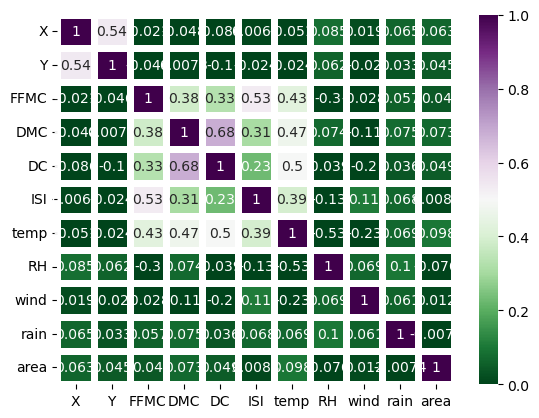

In [13]:
sns.heatmap(portugal_wildfires.corr(), annot=True, cmap='PRGn_r', linewidths=5, 
            linecolor='white', vmin=0,vmax=1, cbar=True)

## Relational Plots

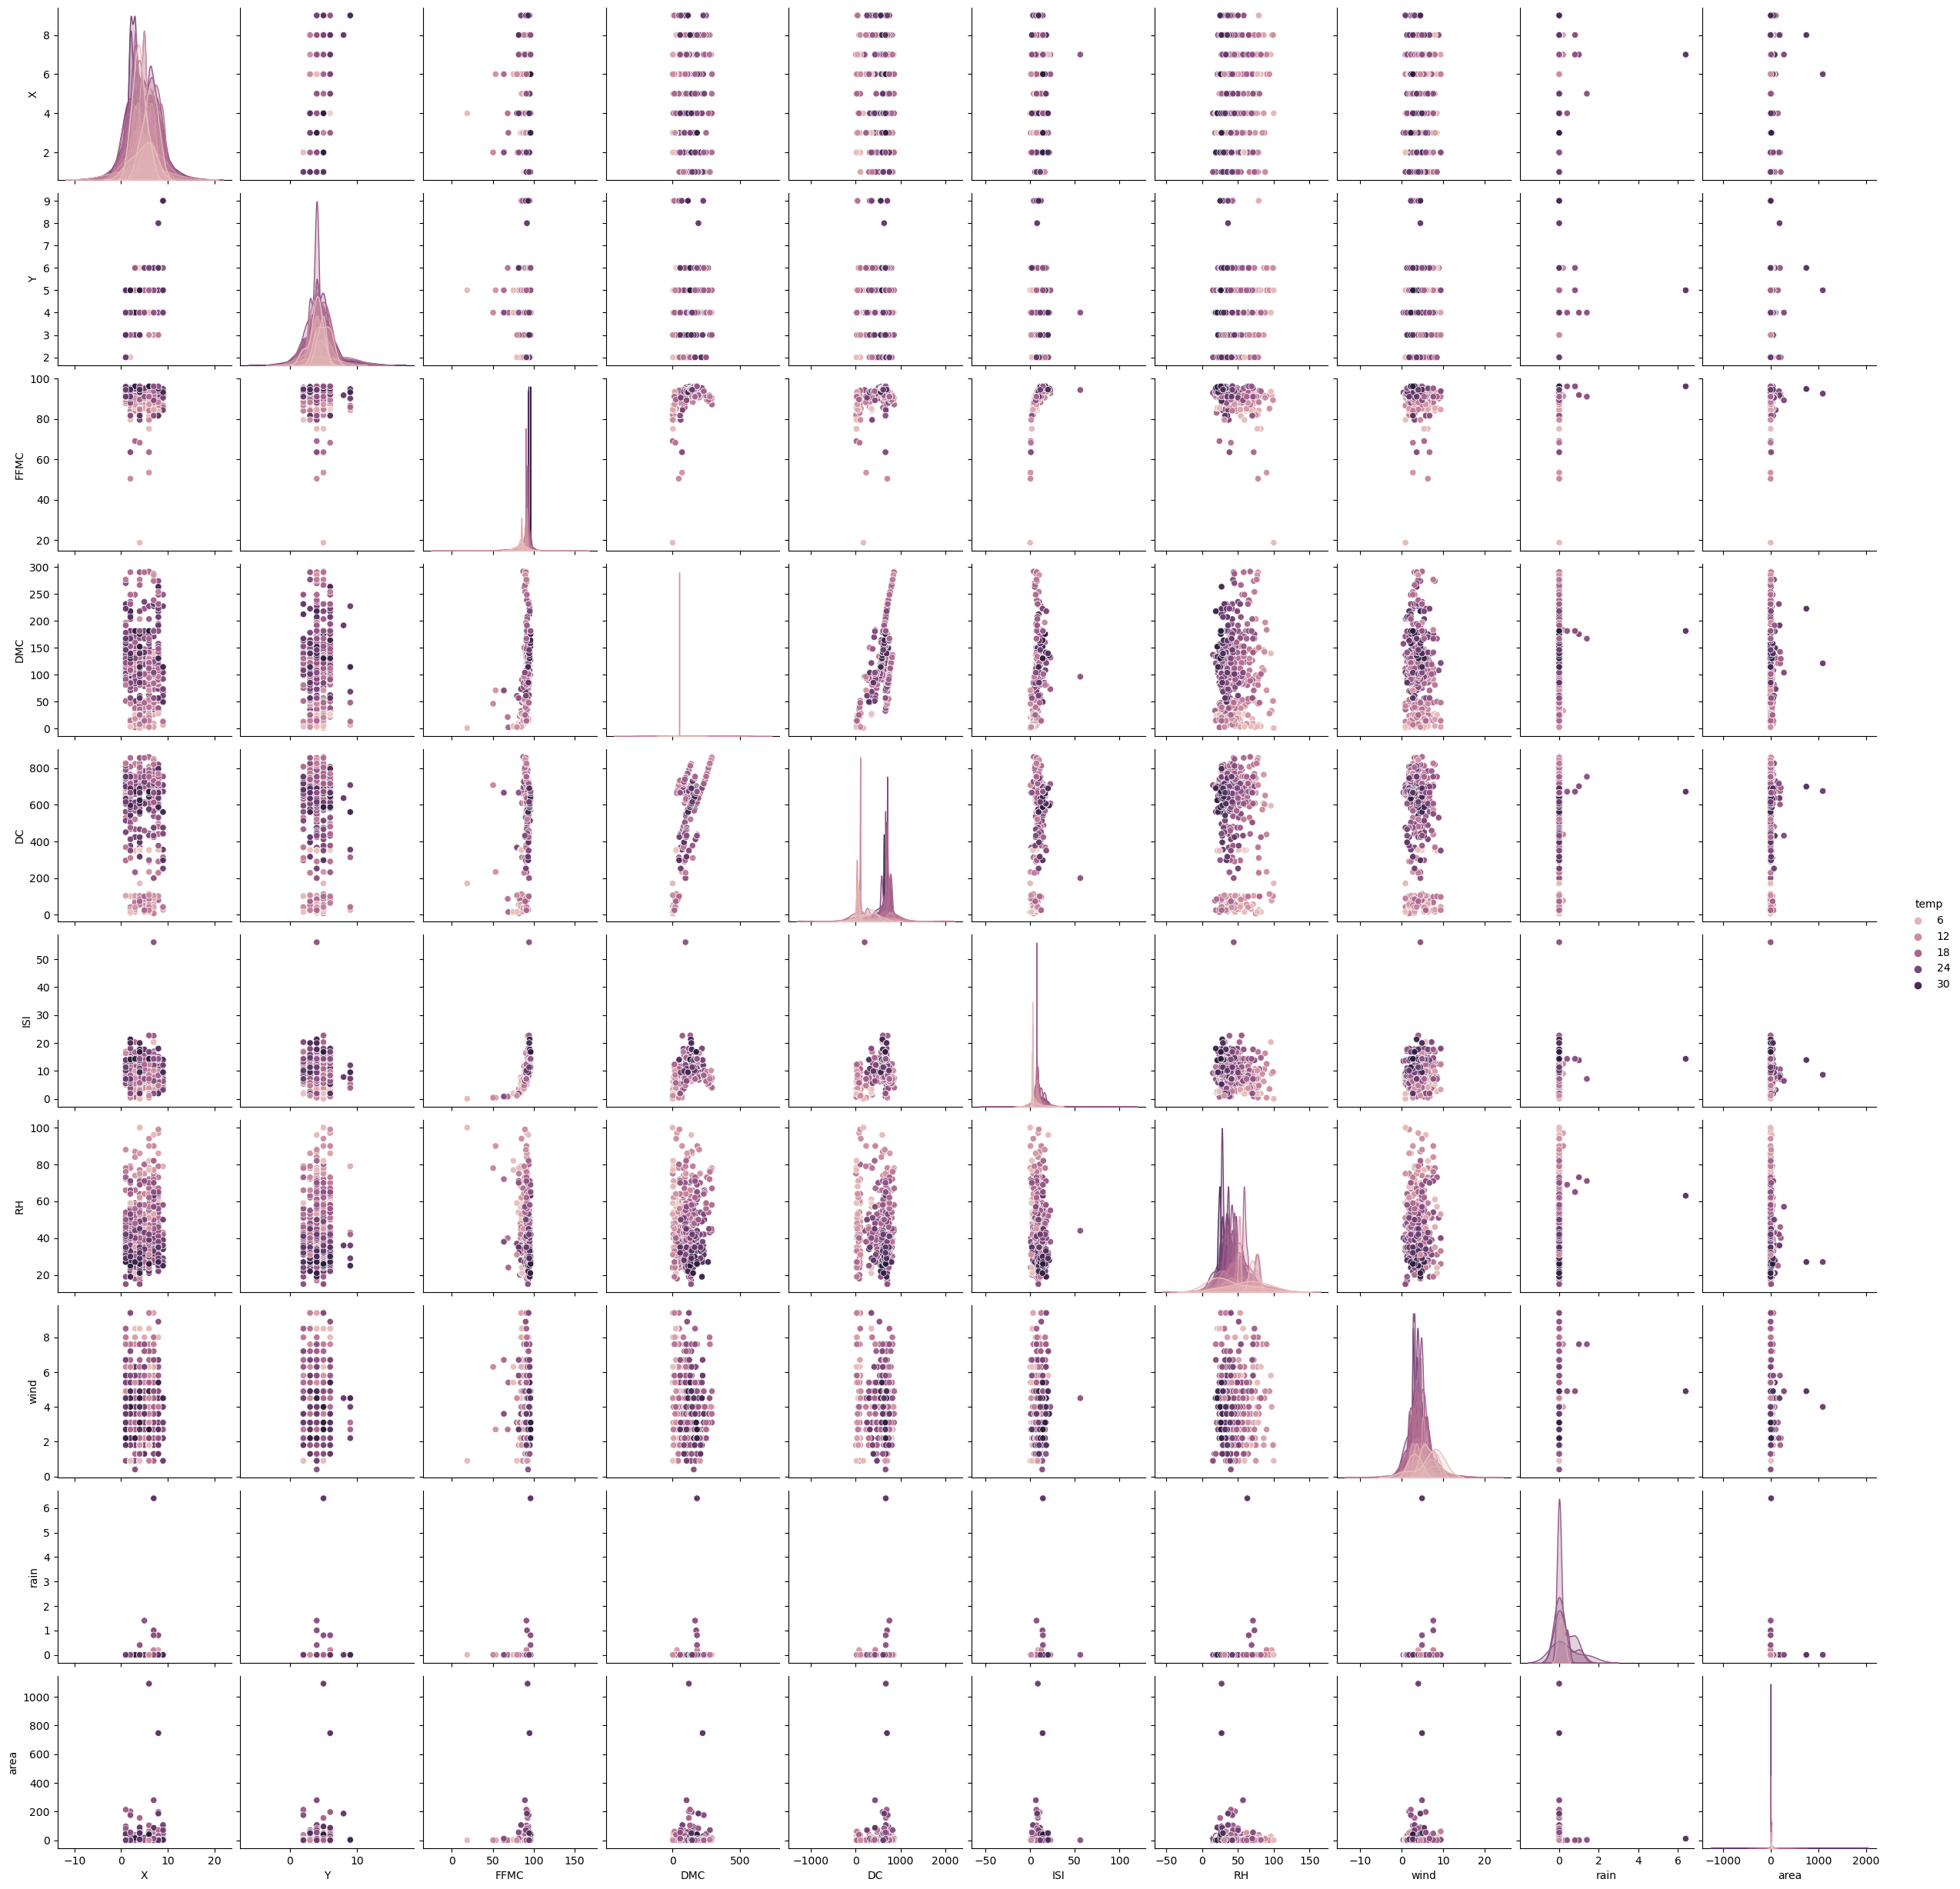

In [14]:
sns.pairplot(data=portugal_wildfires, hue='temp')

## Relation between Temperature and Relative Humidity

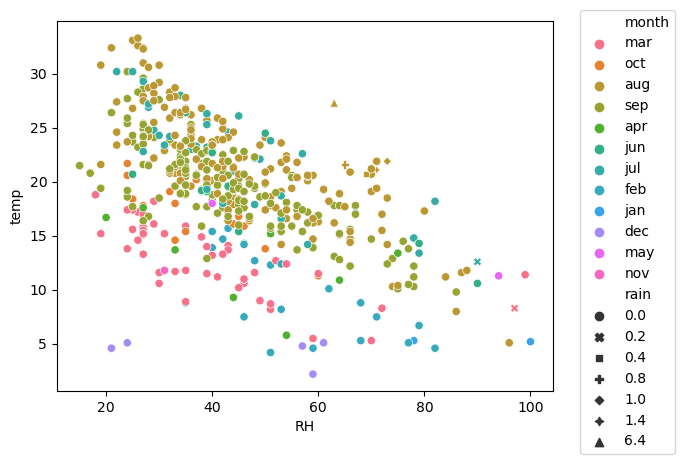

In [15]:
sns.scatterplot(data=portugal_wildfires, y='temp', x='RH', hue='month', style='rain') #, size='size', markers=markers)
plt.legend(loc='center', bbox_to_anchor=(1.15,0.43))

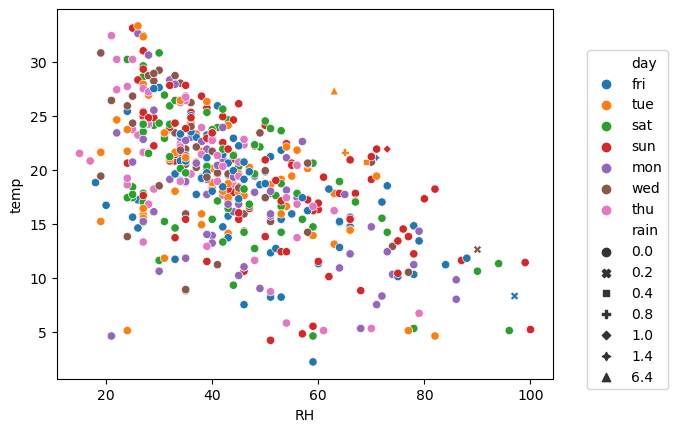

In [16]:
sns.scatterplot(data=portugal_wildfires, y='temp', x='RH', hue='day', style='rain') #, size='size', markers=markers)
plt.legend(loc='center', bbox_to_anchor=(1.15,0.43))

## Relation between Temperature and Burned Areas

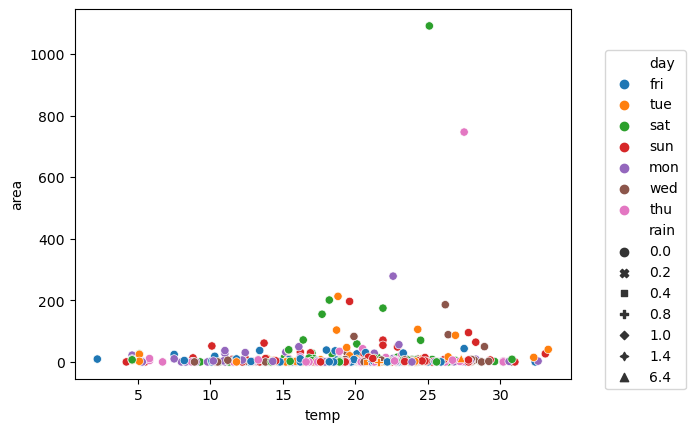

In [17]:
# A plot hued by days and amount of rain 
sns.scatterplot(data=portugal_wildfires, y='area', x='temp', hue='day', style='rain') #, size='size', markers=markers)
plt.legend(loc='center', bbox_to_anchor=(1.15,0.43))

C:\Users\Tole 01\AppData\Local\Temp\ipykernel_54684\2891739261.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  weekend_wildfires = portugal_wildfires[portugal_wildfires.day.str.contains(r'(fri|sat|sun)')]


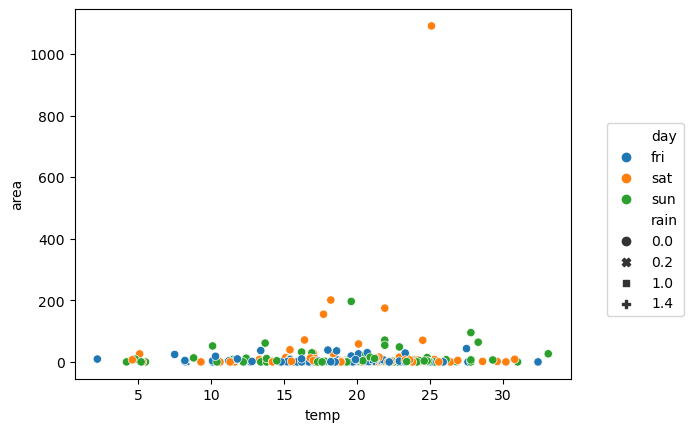

In [18]:
# Dataset filtered by weekends
weekend_wildfires = portugal_wildfires[portugal_wildfires.day.str.contains(r'(fri|sat|sun)')]

# A plot hued by days and amount of rain 
sns.scatterplot(data=weekend_wildfires, y='area', x='temp', hue='day', style='rain') #, size='size', markers=markers)
plt.legend(loc='center', bbox_to_anchor=(1.15,0.43))

Text(0.5, 1.02, 'Distribution of Average Annual Rating According to the last years')

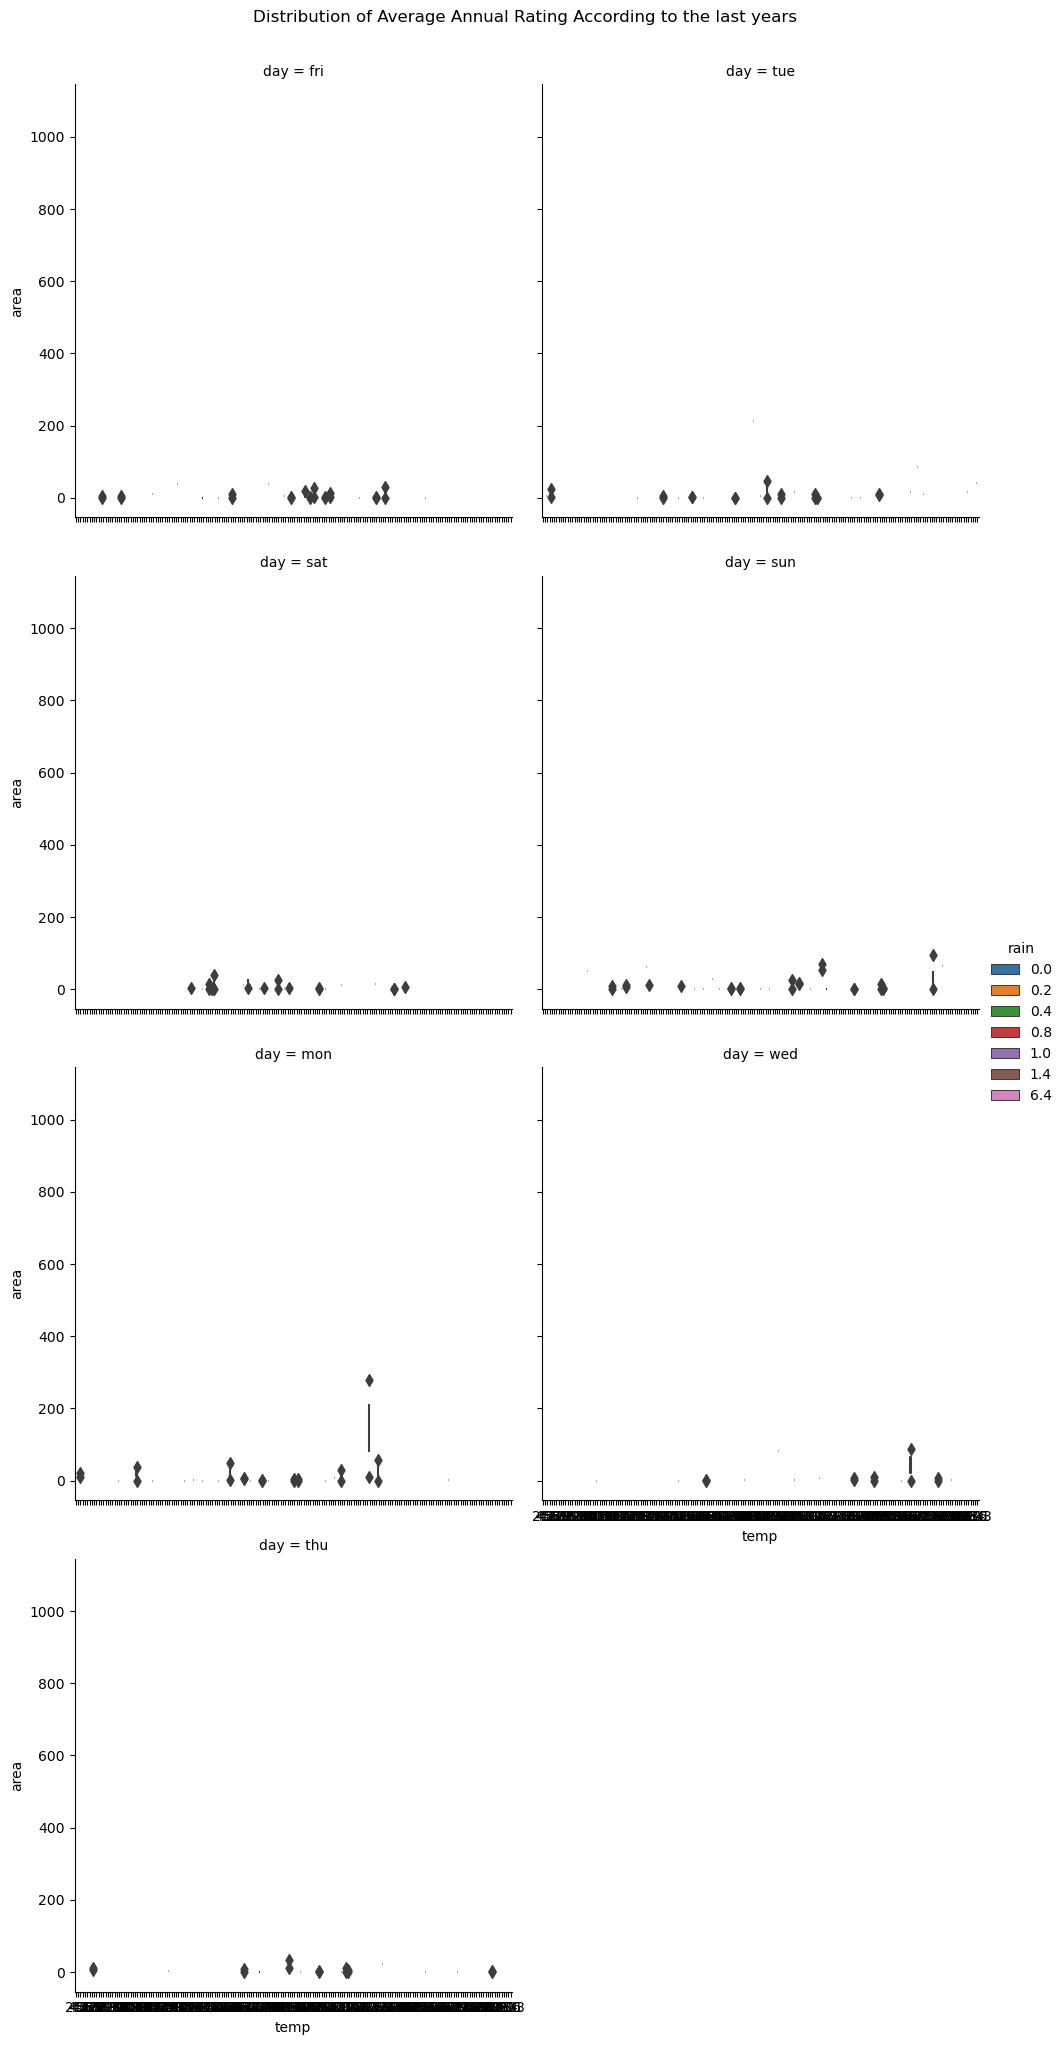

In [19]:
sns.catplot(data=portugal_wildfires ,x='temp', y='area', hue='rain',
            col='day',kind="boxen", col_wrap=2, sharey=True, sharex=True,
            margin_titles=False).fig.suptitle('Distribution of Average Annual Rating According to the last years', 
                                             y=1.02)

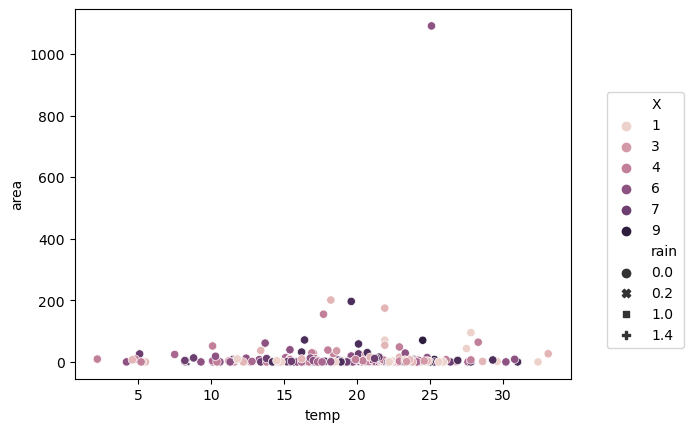

In [20]:
sns.scatterplot(data=weekend_wildfires, y='area', x='temp', hue='X', style='rain') #, size='size', markers=markers)
plt.legend(loc='center', bbox_to_anchor=(1.15,0.43))

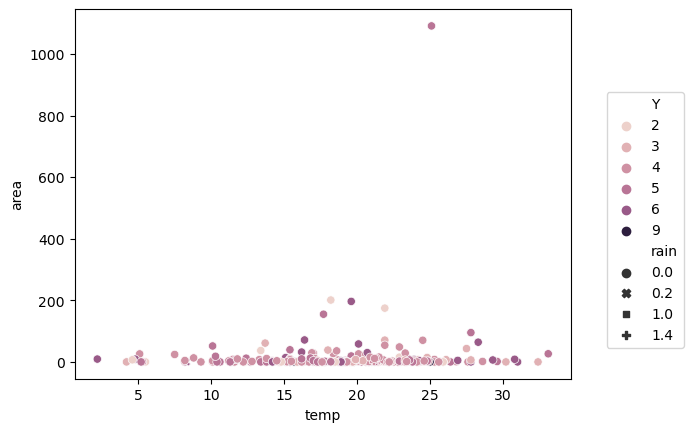

In [21]:
sns.scatterplot(data=weekend_wildfires, y='area', x='temp', hue='Y', style='rain') #, size='size', markers=markers)
plt.legend(loc='center', bbox_to_anchor=(1.15,0.43))

## Burned Areas vs X and Y Coordenates

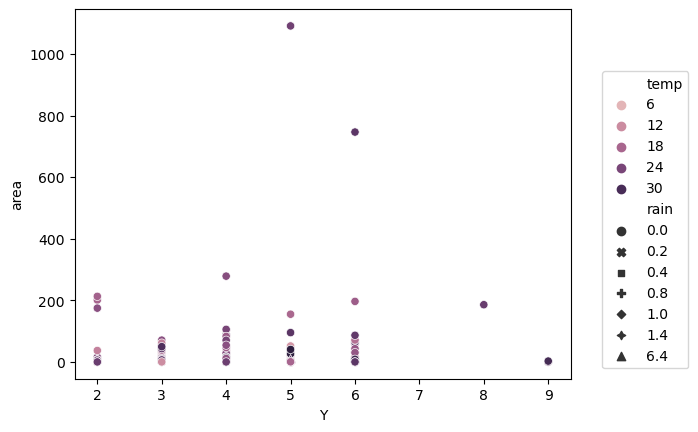

In [22]:
sns.scatterplot(data=portugal_wildfires, y='area', x='Y', hue='temp', style='rain') #, size='size', markers=markers)
plt.legend(loc='center', bbox_to_anchor=(1.15,0.43))

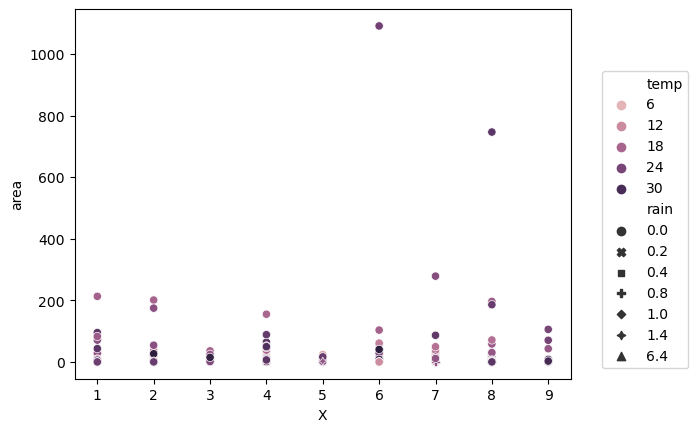

In [23]:
sns.scatterplot(data=portugal_wildfires, y='area', x='X', hue='temp', style='rain') #, size='size', markers=markers)
plt.legend(loc='center', bbox_to_anchor=(1.15,0.43))

## Burned Areas vs Months

We're going to creat a dict that contains the year's months with their corresponding month value to sort the dataframe according to the month.

In [24]:
# Those are the month's codes
portugal_wildfires.month.unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

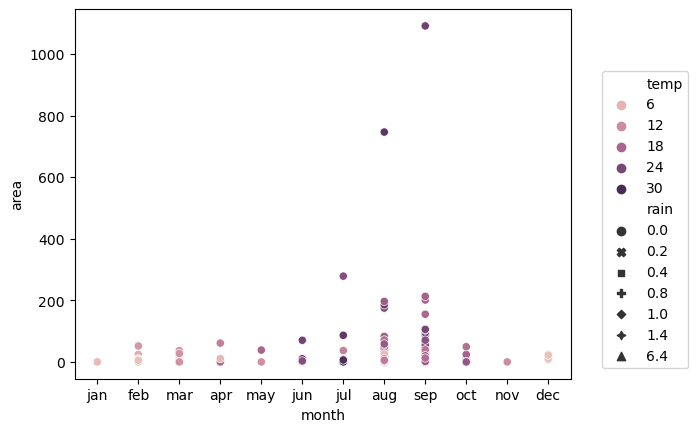

In [25]:
# Months dict created to sorted_values
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 
              'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

# Applies lower() to dict keys
month_dict = {k.lower():v for k, v in month_dict.items()}

# Sorting the DF according to the month_dict
sorted_by_month = portugal_wildfires.sort_values('month', key = lambda x : x.map(month_dict))

#(lambda x : month_dict[x]))

# Creating a plot of Burned areas vs 
sns.scatterplot(data=sorted_by_month, y='area', x='month', hue='temp', style='rain') #, size='size', markers=markers)
plt.legend(loc='center', bbox_to_anchor=(1.15,0.43))

We place the burned areas vs months plots on different days

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


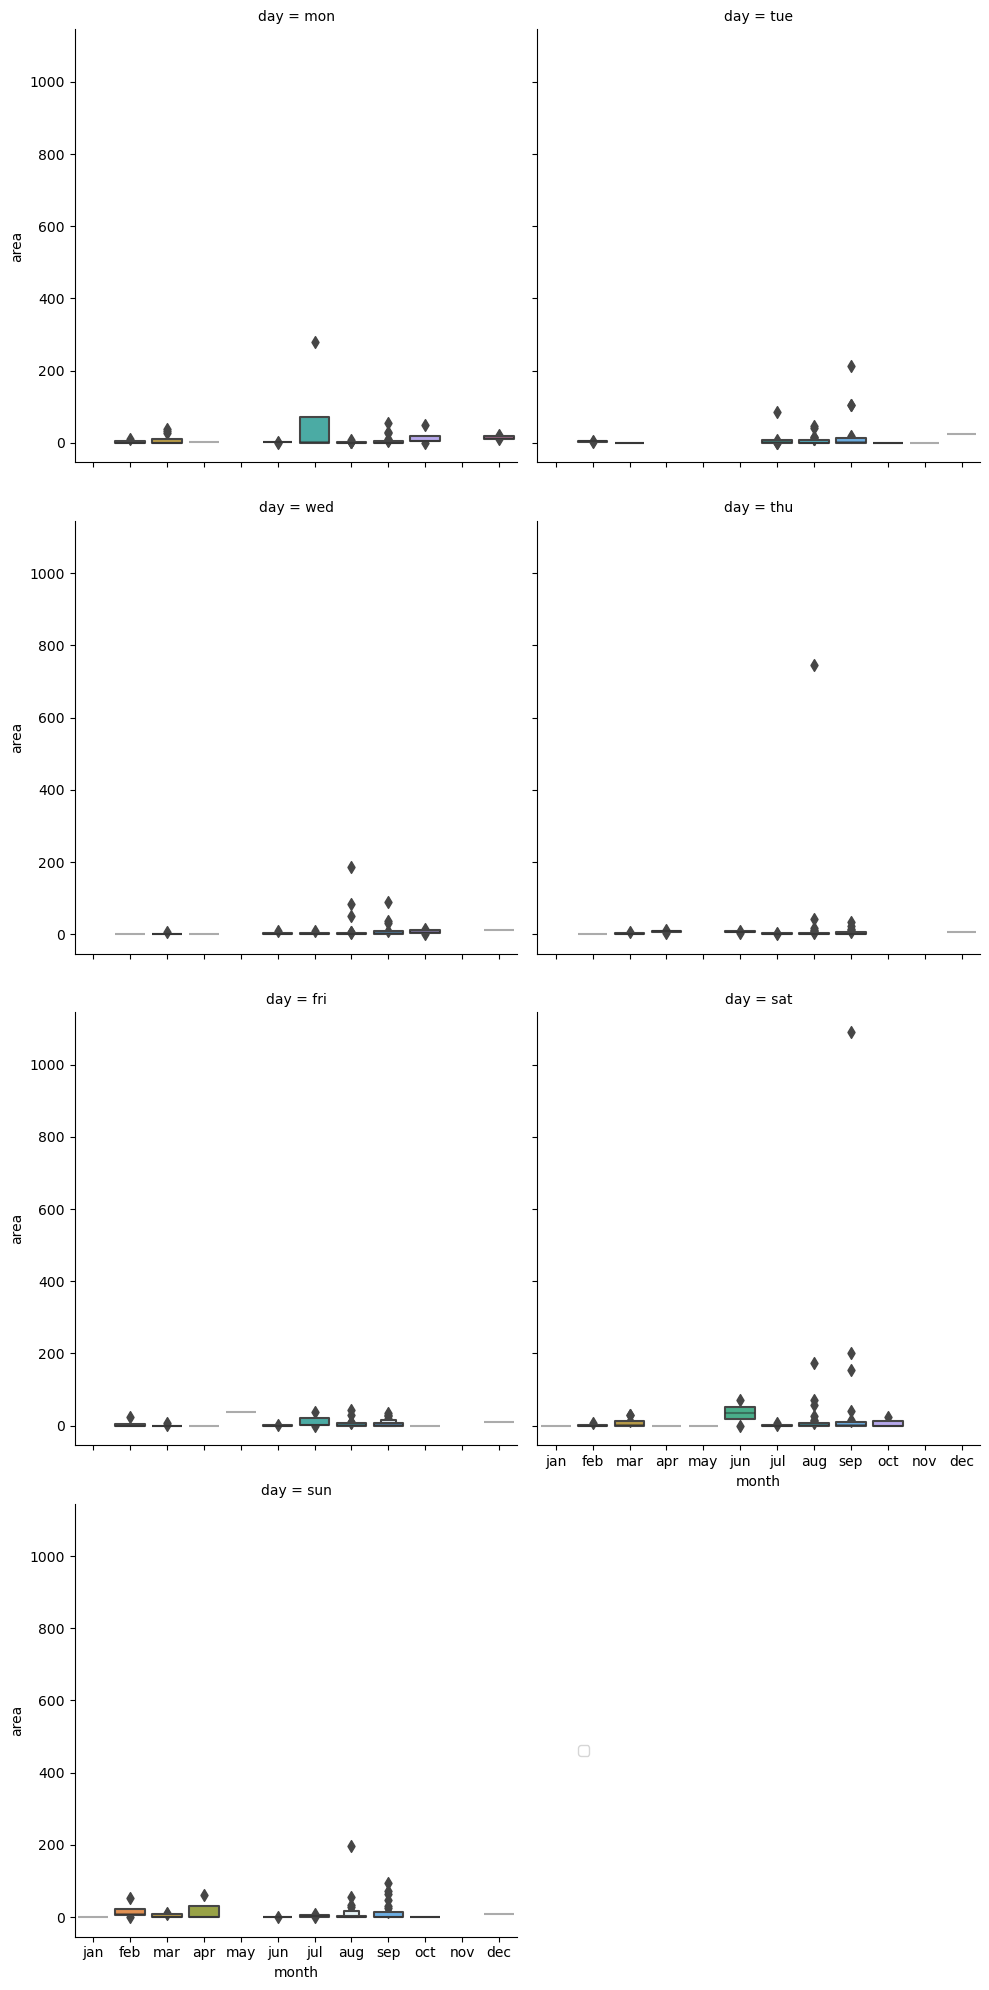

In [26]:
sns.catplot(data=sorted_by_month, y='area', x='month', kind="boxen",  col="day",col_wrap=2, 
            col_order= ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], sharey=True)

plt.legend(loc='center', bbox_to_anchor=(1.15,0.43))

## Burned Areas vs Days

We're going to create a dict that contains days with their corresponding ordered value to sort the dataframe according to the month.

In [27]:
# Those are the day's codes
portugal_wildfires.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

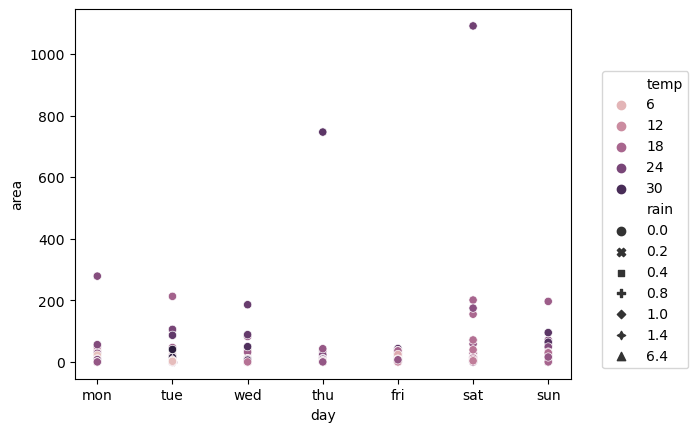

In [28]:
# Codes to identify each day
days_code = ['mon','tue', 'wed', 'thu','fri','sat', 'sun']

# Creating the dict
days_dict = {keys:values for (keys,values) in zip(days_code,range(1,8))}
days_dict

# Sorting the DF according to the days_dict
sorted_by_day = portugal_wildfires.sort_values('day', key = lambda x : x.map(days_dict))

# Creating a plot of Burned areas vs Days
sns.scatterplot(data=sorted_by_day, y='area', x='day', hue='temp', style='rain') #, size='size', markers=markers)
plt.legend(loc='center', bbox_to_anchor=(1.15,0.43))

We place the burned areas vs days plots on different months

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


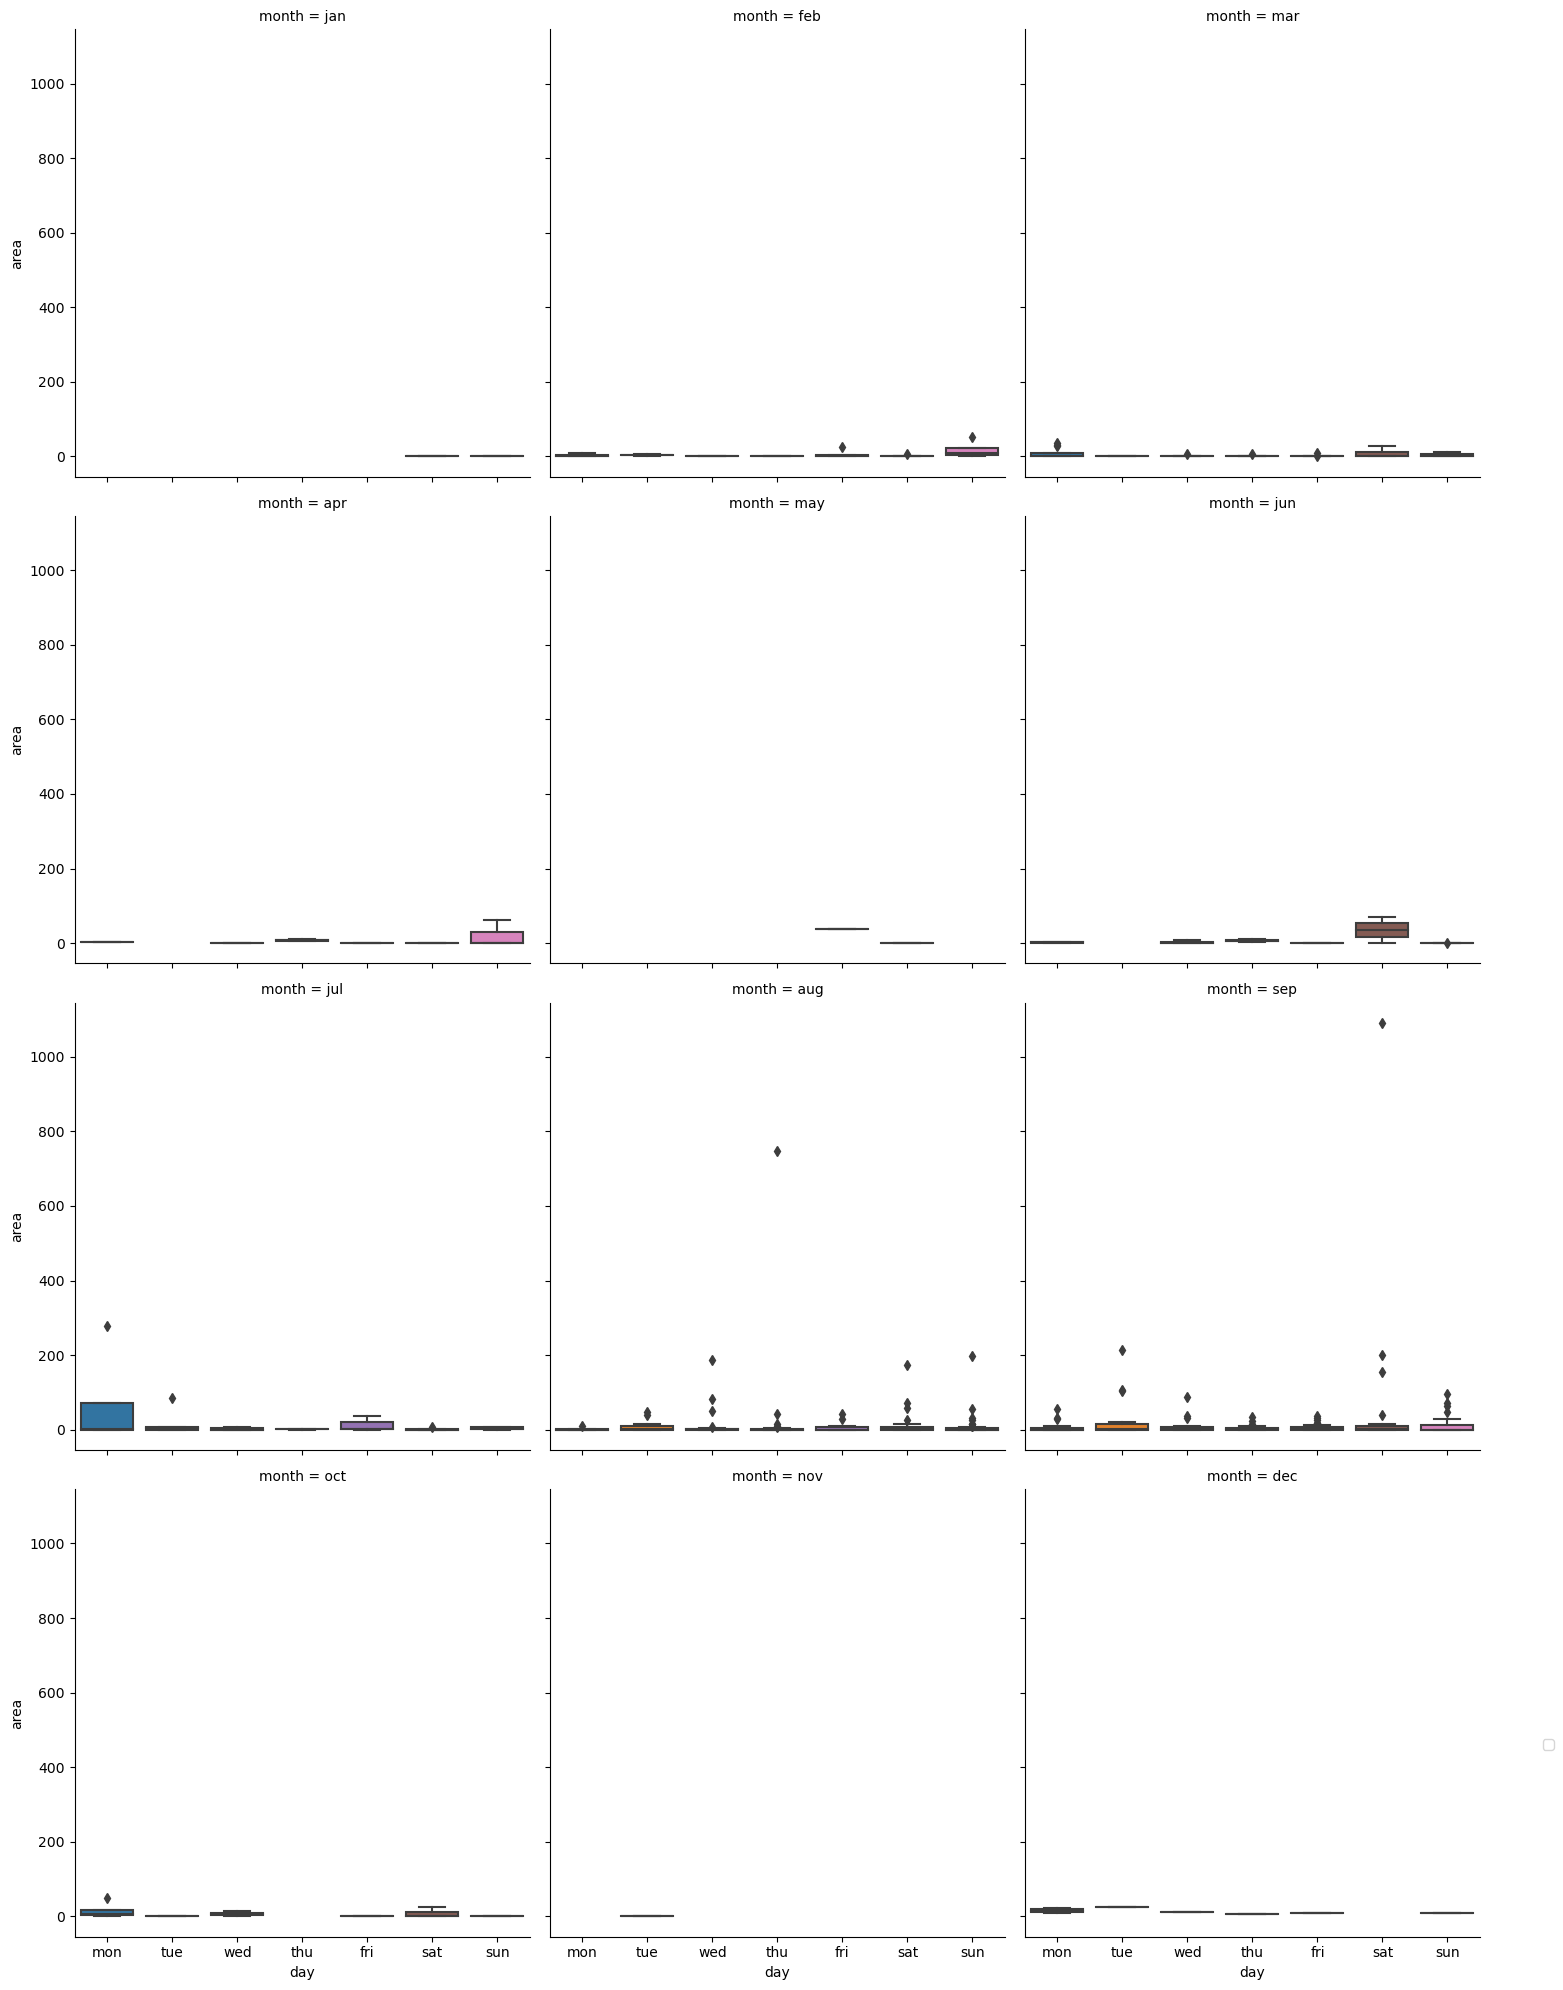

In [29]:
sns.catplot(data=sorted_by_day, y='area', x='day', kind="box", col="month",col_wrap=3, 
            col_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 
                       'oct', 'nov', 'dec'], sharey=True)

plt.legend(loc='center', bbox_to_anchor=(1.15,0.43))

## Statistics of Damaged Areas according to Days or Months

In [30]:
areas_groped_by_days = portugal_wildfires[['day','area']].groupby('day').describe()
areas_groped_by_days['median'] = portugal_wildfires[['day','area']].groupby('day').median() 
areas_groped_by_days

area                                                          median
    count       mean         std  min  25%    50%     75%      max       
day                                                                      
fri  85.0   5.261647   10.012083  0.0  0.0  0.330  5.9700    43.32  0.330
mon  74.0   9.547703   33.703562  0.0  0.0  0.745  6.0325   278.53  0.745
sat  84.0  25.534048  122.698840  0.0  0.0  0.340  7.5500  1090.84  0.340
sun  95.0  10.104526   26.076032  0.0  0.0  0.000  6.8150   196.48  0.000
thu  61.0  16.345902   95.351052  0.0  0.0  0.900  4.9500   746.28  0.900
tue  64.0  12.621719   33.568193  0.0  0.0  0.655  8.8500   212.88  0.655
wed  54.0  10.714815   30.285914  0.0  0.0  0.760  5.7825   185.76  0.760

In [31]:
areas_groped_by_months = portugal_wildfires[['month','area']].groupby('month').describe()
areas_groped_by_months['median'] = portugal_wildfires[['month','area']].groupby('month').median() 
areas_groped_by_months

area                                                              \
       count       mean        std   min   25%     50%      75%      max   
month                                                                      
apr      9.0   8.891111  19.929092  0.00  0.00   0.000   4.6100    61.13   
aug    184.0  12.489076  60.364174  0.00  0.00   0.545   5.0275   746.28   
dec      9.0  13.330000   6.610747  5.38  9.27  10.730  17.8500    24.77   
feb     20.0   6.275000  12.342510  0.00  0.00   0.550   6.4950    51.78   
jan      2.0   0.000000   0.000000  0.00  0.00   0.000   0.0000     0.00   
jul     32.0  14.369687  50.849299  0.00  0.00   1.035   6.3675   278.53   
jun     17.0   5.841176  16.884945  0.00  0.00   0.000   3.1900    70.32   
mar     54.0   4.356667   9.140107  0.00  0.00   0.000   3.0175    36.85   
may      2.0  19.240000  27.209469  0.00  9.62  19.240  28.8600    38.48   
nov      1.0   0.000000        NaN  0.00  0.00   0.000   0.0000     0.00   
oct     15.0   6.638000  13.699522  0.00  0.00   0.000   6.1350    49.37   
sep    172.0  17.942616  87.648175  0.00  0.00   1.360   7.5600  1090.84   

       median  
               
month          
apr     0.000  
aug     0.545  
dec    10.730  
feb     0.550  
jan     0.000  
jul     1.035  
jun     0.000  
mar     0.000  
may    19.240  
nov     0.000  
oct     0.000  
sep     1.360

## Burned Areas vs Wind Plots

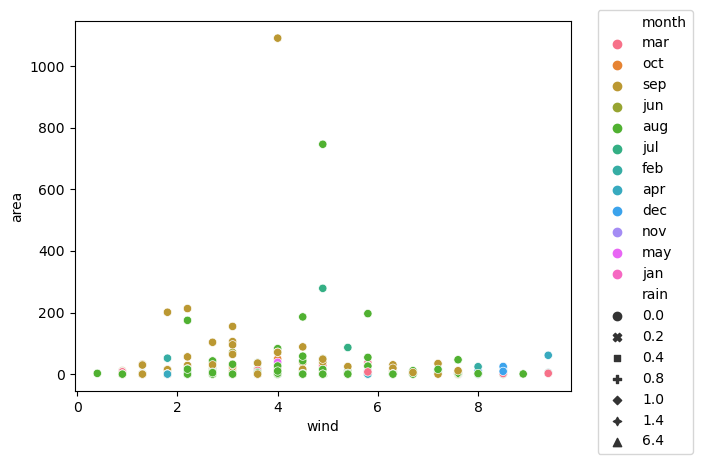

In [32]:
sns.scatterplot(data=sorted_by_day, y='area', x='wind', hue='month', style='rain') #, size='size', markers=markers)
plt.legend(loc='center', bbox_to_anchor=(1.15,0.43))

## Calculating Build Up Index (BUI)

The BUI tell us the total fuel available to the spreading fire and it's computed throught the next equations:

$BUI = 0.8 \frac{PD}{P + 0.4D}$                                          used when    $ P \leq 0.4D$



$BUI = P - (1-\frac{0.8D}{(P + 0.4D)})(0.92 + (0.0114P)^{1.7})$          used when    $ P > 0.4D$

where P is defined as DMC and D as DC.

To compute a value to the power of 1.7 we're gonna use the **`math`** module.


In [33]:
import math

def BUI_calculation(DMC: float, DC: float) -> float:
    if DMC <= 0.4 * DC:
        return (0.8 * DMC * DC)/(DMC + 0.4 * DC)
    
    elif DMC > 0.4 * DC:
        return DMC - (1 - (0.8 * DC)/(DMC + 0.4 * DC)) * (0.92 + math.pow(0.0114 * DMC, 1.7))

In [34]:
portugal_wildfires['BUI'] = portugal_wildfires.apply(lambda x: BUI_calculation(x['DMC'], x['DC']), axis=1)
portugal_wildfires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,BUI
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,30.921902
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,62.529409
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,75.406720
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,33.260199
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,51.150592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,93.489862
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,93.489862
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,93.489862
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,183.211595


## Calculating Fire Weather Index (FWI)

The FWI tell us the intensity of the spreading fire as energy output rate per unit lenght of fire front. First at all we must compute the value of f(D) through the next pair of  equations:

$f(D) = 0.626 U^{0.809} + 2$ used when $U \leq 80$

$f(D) = \frac{1000}{25 + 108.64 e^{-0.023U}} $ used when $U > 80$

where U is BUI. Then, we must solve the next eq to obtain the variable B:

$B = 0.1 R f(D)$

where R is defined as ISI. Finally, we'll compute FWI through the next equations:

$In S = 2.72 (0.434 ln B)^{0.647}$ used when $B > 1$

$ S = B$ used when $B \leq 1$

In [35]:
def D_eq(BUI: float) -> float:
    
    if BUI <= 80:
        return 0.626 * math.pow(BUI,0.809) + 2
    
    elif BUI > 80:
        return 1000/(25 + 108.64 * math.exp(-0.023*BUI))

In [36]:
def B_eq(ISI: float, fD: float) -> float:
    return 0.1 * ISI * fD

In [37]:
def FWI_eq(B: float) -> float:
    if B > 1:
        return math.exp(2.72 * math.pow((0.434 * math.log10(B)), 0.647))
    
    elif B <= 1:
        return B

In [38]:
portugal_wildfires.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'BUI'],
      dtype='object')

### Create the corresponding columns for D, B and FWI values

In [39]:
portugal_wildfires['D_Value'] = portugal_wildfires.apply(lambda x: D_eq(x['BUI']), axis=1)
portugal_wildfires['B_Value'] = portugal_wildfires.apply(lambda x: B_eq(x['ISI'], x['D_Value']), axis=1)
portugal_wildfires['FWI'] = portugal_wildfires.apply(lambda x: FWI_eq(x['B_Value']), axis=1)
portugal_wildfires.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,BUI,D_Value,B_Value,FWI
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,30.921902,12.050778,6.145897,3.893108
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,62.529409,19.766691,13.243683,5.515408
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,75.406720,22.672789,15.190768,5.845459
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,33.260199,12.661333,11.395200,5.168503
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,51.150592,17.102002,16.417922,6.038298


## Heatmap for the new DF

Text(0.55, 1.05, 'Correlation Heatmap between Variables')

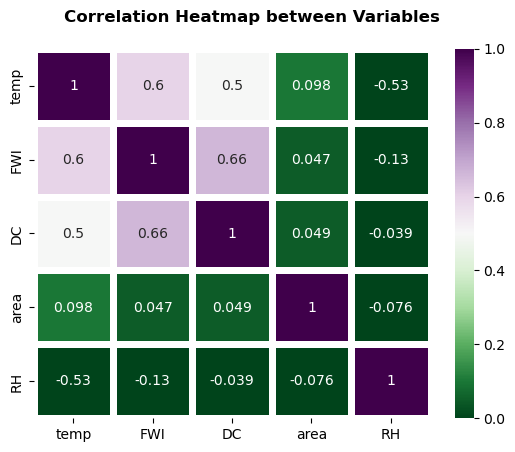

In [40]:
# New DF
wildfires_other_variables = portugal_wildfires[['X','Y','temp','FWI','DC','area','RH']].sort_values(by='area', ascending=False)

# Stablish font size (Activate after run all the program, just to copy the resultant correlation heatmap)
#sns.set(font_scale=1.1)

# Heatmap
sns.heatmap(wildfires_other_variables[['temp','FWI','DC', 'area','RH']].corr(), annot=True, cmap='PRGn_r', linewidths=5, 
            linecolor='white', vmin=0,vmax=1, cbar=True)

# Title
plt.title('Correlation Heatmap between Variables', y=1.05,  x=0.55, fontweight='bold')

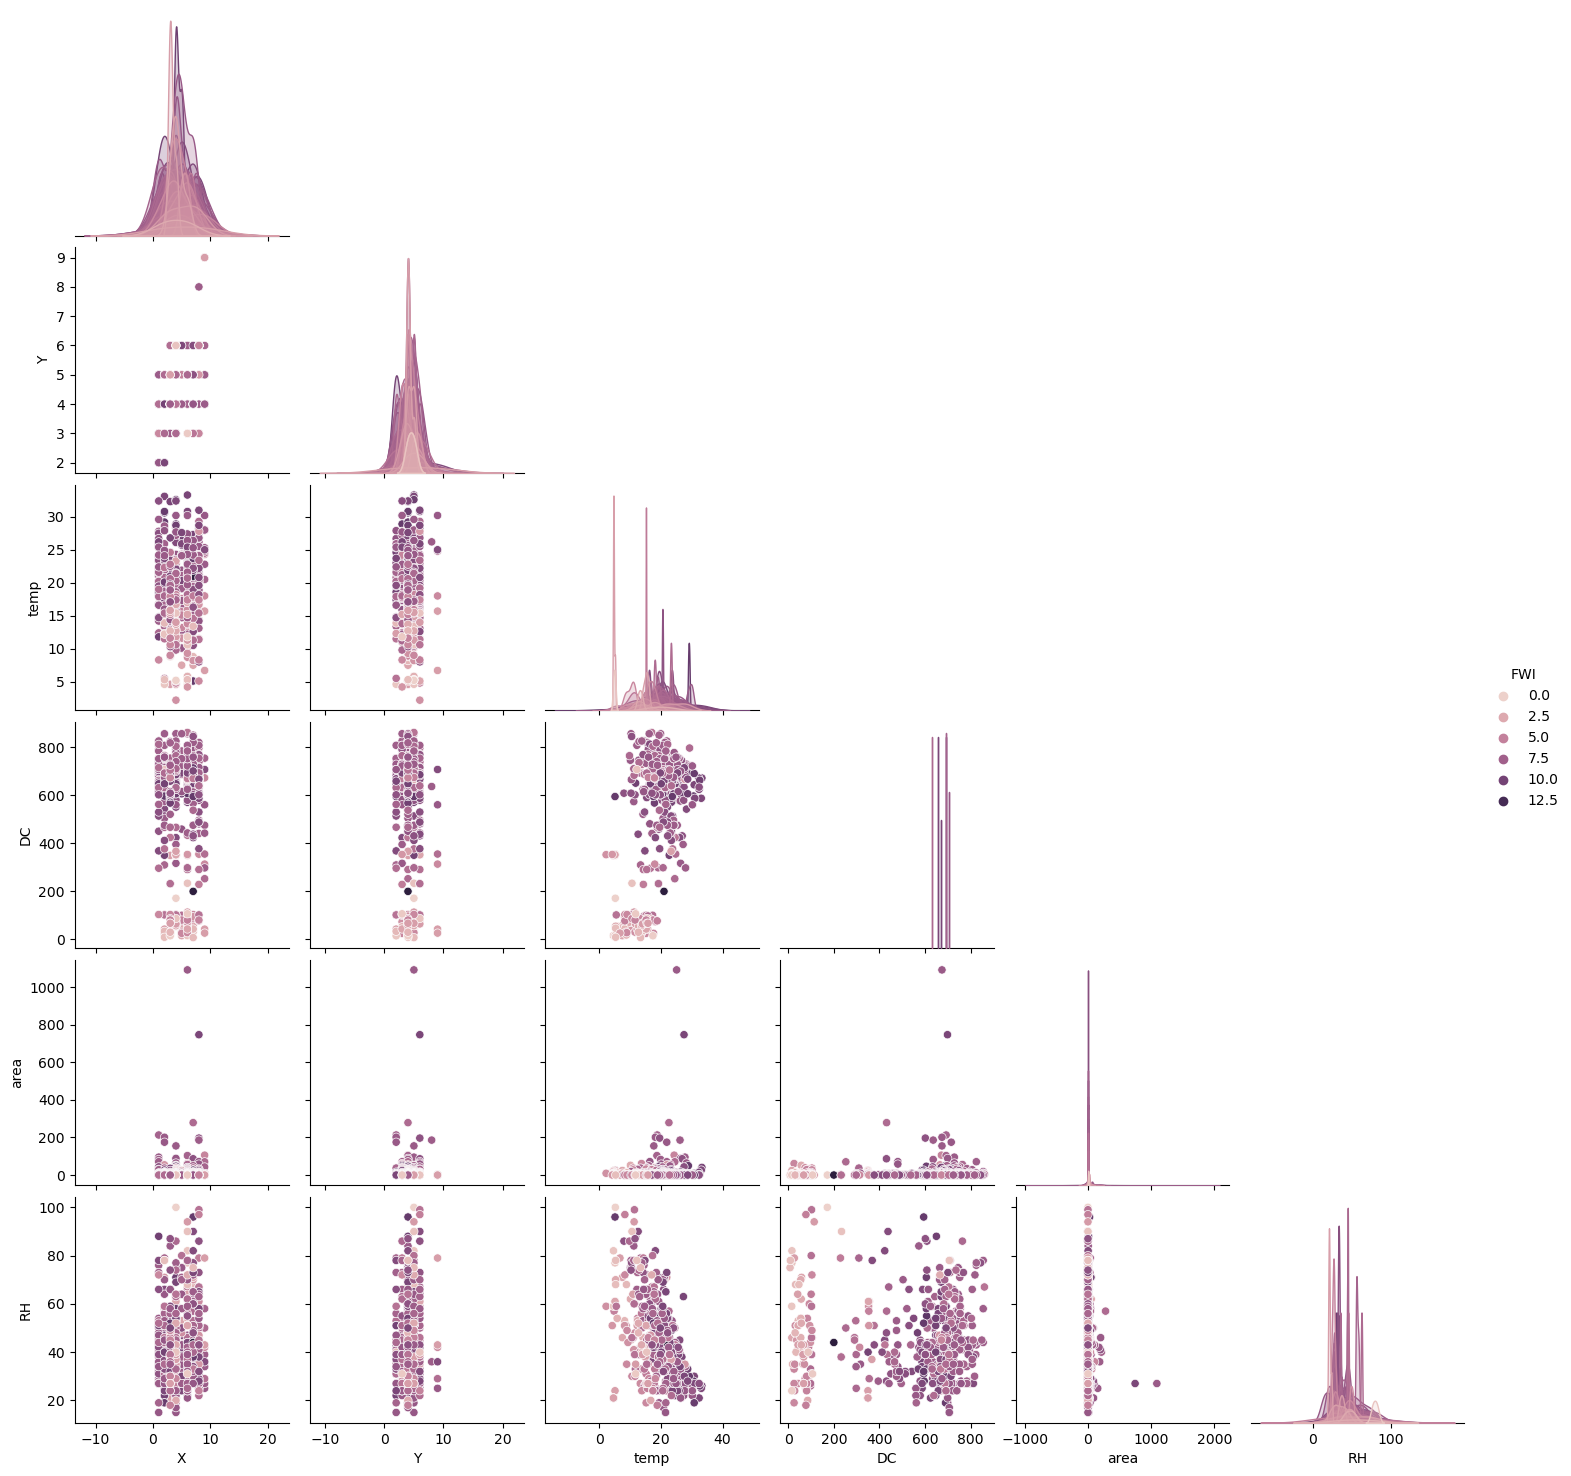

In [41]:
# Comparison between variables
sns.pairplot(data=wildfires_other_variables,hue='FWI', corner=True)

<AxesSubplot: xlabel='FWI', ylabel='DC'>

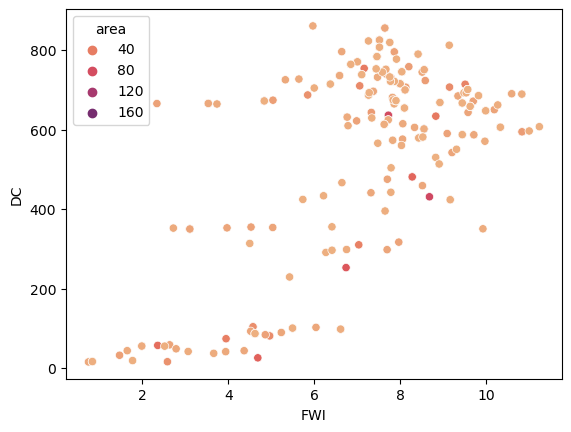

In [42]:
sns.scatterplot(wildfires_other_variables[(wildfires_other_variables.area < 200) & (wildfires_other_variables.area > 0)],
                y='DC', x='FWI', hue='area', palette=sns.color_palette("flare", as_cmap=True))


Text(0.5, 1.0, 'DC and Temperature Relationship classified by FWI values')

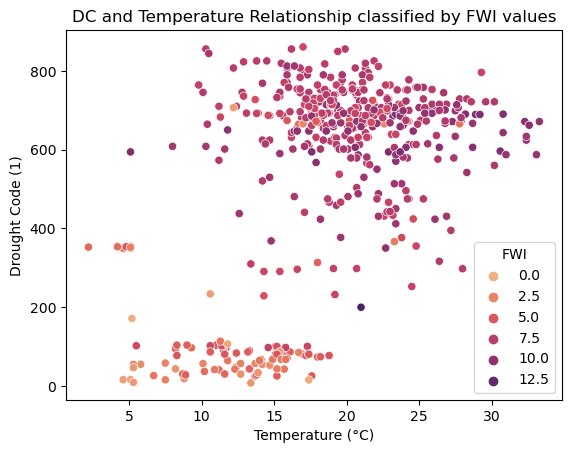

In [43]:
sns.scatterplot(wildfires_other_variables, y='DC', x='temp', hue='FWI', palette=sns.color_palette("flare", as_cmap=True))

plt.xlabel('Temperature (°C)')
plt.ylabel('Drought Code (1)')

plt.title('DC and Temperature Relationship classified by FWI values')

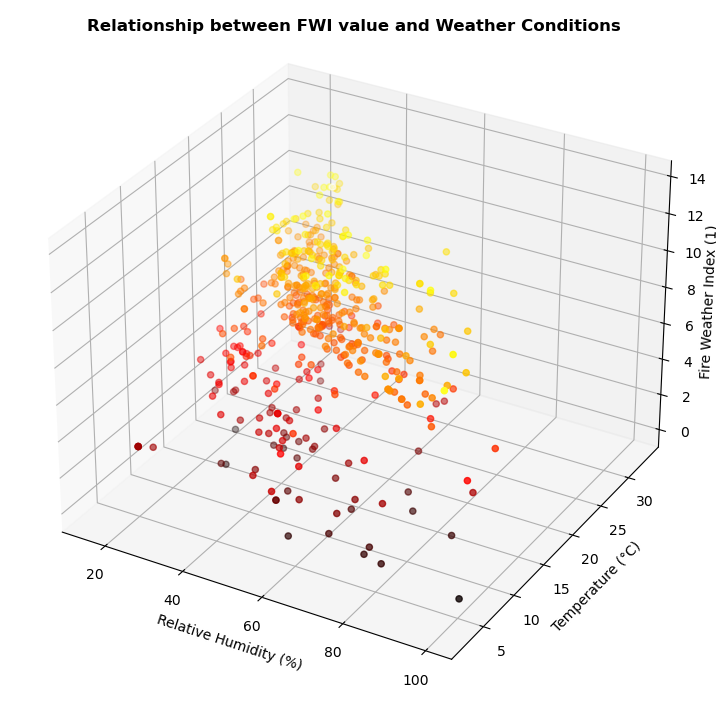

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

# Plot's data
x = wildfires_other_variables.RH
y = wildfires_other_variables.temp
z = wildfires_other_variables.FWI

# Set Labels
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
ax.set_zlabel('Fire Weather Index (1)')

# Stablish the distance between Z axis and Z label
ax.zaxis.labelpad=-1.4

# Main Title
fig.suptitle("Relationship between FWI value and Weather Conditions", y=0.87, x=0.51,  fontweight='bold')

# Show the  plot
ax.scatter(x,y,z, depthshade=True, c=z, cmap ='hot')

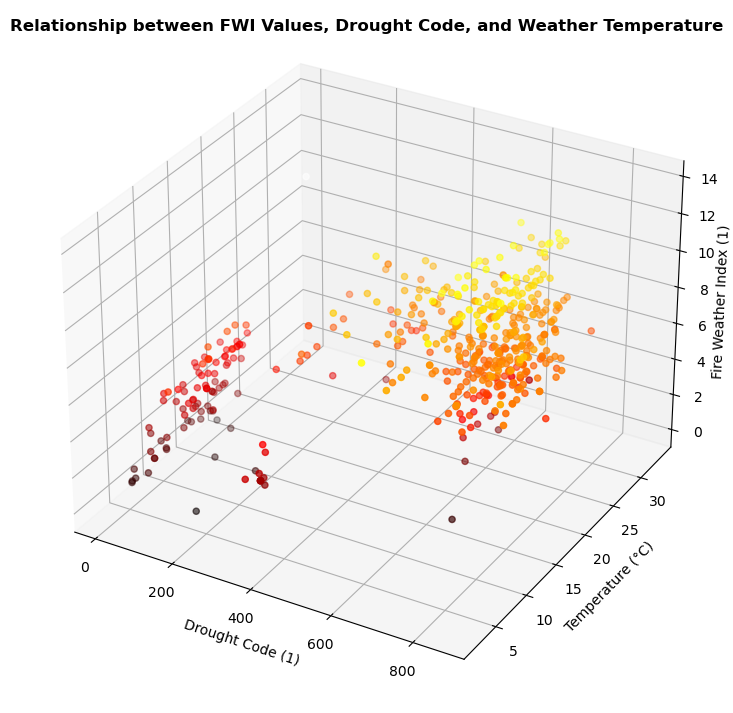

In [45]:
fig3D = plt.figure(figsize=(9,9))
ax3D = fig3D.add_subplot(111, projection='3d')

# Plot's data
x = wildfires_other_variables.DC
y = wildfires_other_variables.temp
z = wildfires_other_variables.FWI

# Set Labels
plt.xlabel('Drought Code (1)')
plt.ylabel('Temperature (°C)')
ax3D.set_zlabel('Fire Weather Index (1)')

# Stablish the distance between Z axis and Z label
ax3D.zaxis.labelpad=-1.4

# Main Title
fig3D.suptitle('Relationship between FWI Values, Drought Code, and Weather Temperature', y=0.87, x=0.51, fontweight='bold')

# Show the  plot
ax3D.scatter(x,y,z, depthshade=True, c=z, cmap ='hot')

## REGRESSION ANALYSIS

In [46]:
# Math Module
from math import sqrt

# Skelearn Module
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [47]:
# Defines Features
features = ['temp', 'DC', 'area', 'RH']

# Defines Target
target = [ 'FWI']

# Define X dataframe
X = portugal_wildfires[features]

# Define Y dataframe
Y = portugal_wildfires[target]

# Training Dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.11, random_state=81)

### Training the Linear Regression Model

In [48]:
# Define model 
regressor = LinearRegression()

# Fit training data on the model
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
# Prediction Dataset
y_prediction = regressor.predict(X_test)

# FWI are integer values, so we must rounding y_prediction results to compare them properly
#for i,n in zip(y_prediction, range(len(y_prediction))):
#    y_prediction[n] = round(float(i))

### Evaluating Accuracy by Root Mean Square Error

In [50]:
RMSE = sqrt(mean_squared_error(y_true= y_test, y_pred= y_prediction))
RMSE

1.0487905019392023

## DECISION TREE REGRESSOR

### Training the Decision Tree Regression Model

In [51]:
# Training Dataset
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, Y, test_size=0.13, random_state=42)

# Define model 
tree_regressor = DecisionTreeRegressor(max_depth=14)

# Fit training data on the model
tree_regressor.fit(X_train_tree, y_train_tree)

DecisionTreeRegressor(max_depth=14)

### Prediction

In [52]:
# Prediction Dataset
y_TreePrediction = tree_regressor.predict(X_test_tree)

# FWI are integer values, so we must rounding y_prediction results to compare them properly
#for i,n in zip(y_TreePrediction, range(len(y_TreePrediction))):
#    y_TreePrediction[n] = round(float(i))

### Root Mean Square Error

In [53]:
RMSE = sqrt(mean_squared_error(y_true= y_test_tree, y_pred= y_TreePrediction))
RMSE

0.6993817765526882

## NEW DATA FOR PREDICTION

We create 2 datasets for prediction by applying mean and median function to them. Those datasets will be grouped by multiindex(x and y coordinates)

In [54]:
# Average variables from a dataset grouped by coordinates
mean_data_by_coordinates = wildfires_other_variables[['X','Y','temp','FWI','DC','area','RH']].groupby(['X','Y']).mean().reset_index()

# Median variables from a dataset grouped by coordinates
median_data_by_coordinates = wildfires_other_variables[['X','Y','temp','FWI','DC','area','RH']].groupby(['X','Y']).median().reset_index()

In [55]:
# Defining data for heatmaps from average variables
temperature_MeanHeatmap = mean_data_by_coordinates.pivot("Y","X", "temp")
area_MeanHeatmap = mean_data_by_coordinates.pivot("Y","X", "area")
fwi_MeanHeatmap = mean_data_by_coordinates.pivot("Y","X", "FWI")
dc_MeanHeatmap = mean_data_by_coordinates.pivot("Y","X", "DC")

# Defining data for heatmaps from median variables
temperature_MedianHeatmap = median_data_by_coordinates.pivot("Y","X", "temp")
area_MedianHeatmap = median_data_by_coordinates.pivot("Y","X", "area")
fwi_MedianHeatmap = median_data_by_coordinates.pivot("Y","X", "FWI")
dc_MedianHeatmap = median_data_by_coordinates.pivot("Y","X", "DC")


C:\Users\Tole 01\AppData\Local\Temp\ipykernel_54684\1059129759.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  temperature_MeanHeatmap = mean_data_by_coordinates.pivot("Y","X", "temp")
C:\Users\Tole 01\AppData\Local\Temp\ipykernel_54684\1059129759.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  area_MeanHeatmap = mean_data_by_coordinates.pivot("Y","X", "area")
C:\Users\Tole 01\AppData\Local\Temp\ipykernel_54684\1059129759.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  fwi_MeanHeatmap = mean_data_by_coordinates.pivot("Y","X", "FWI")
C:\Users\Tole 01\AppData\Local\Temp\ipykernel_54684\1059129759.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  dc_MeanHeatmap = mean_data_by_coordinates.pivot("Y","X", "DC")
C:\Users\Tole 01\AppData\Local\Temp\ipykernel_5

<Figure size 640x480 with 0 Axes>

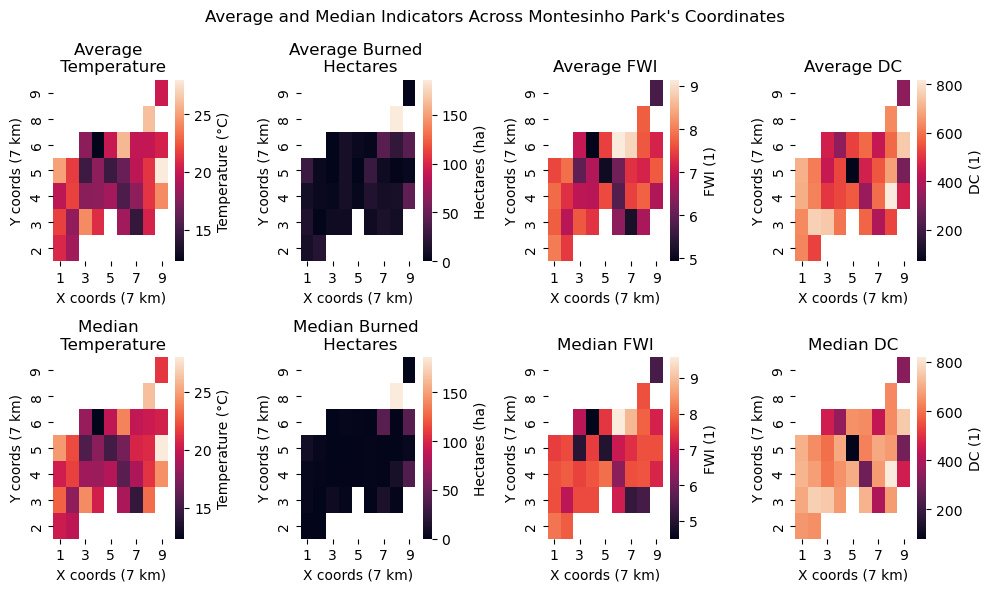

In [56]:
# Creating a Fig matrix that contains all the heatmap's data
Figure = plt.figure()
Figure, ax1 = plt.subplots(2,4,figsize=(10,6), sharey=False)

# Columns {0:temperature, 1:burned area, 2:FWI, 3:DC}

# The first row corresponds to Average Data
sns.heatmap(temperature_MeanHeatmap, ax=ax1[0,0], cbar_kws={'label': 'Temperature (°C)'})
sns.heatmap(area_MeanHeatmap, ax=ax1[0,1], cbar_kws={'label': 'Hectares (ha)'})
sns.heatmap(fwi_MeanHeatmap, ax=ax1[0,2], cbar_kws={'label': 'FWI (1)'})
sns.heatmap(dc_MeanHeatmap, ax=ax1[0,3], cbar_kws={'label': 'DC (1)'})

# The second row corresponds to Median Data
sns.heatmap(temperature_MedianHeatmap, ax=ax1[1,0], cbar_kws={'label': 'Temperature (°C)'})
sns.heatmap(area_MedianHeatmap, ax=ax1[1,1], cbar_kws={'label': 'Hectares (ha)'})
sns.heatmap(fwi_MedianHeatmap, ax=ax1[1,2], cbar_kws={'label': 'FWI (1)'})
sns.heatmap(dc_MedianHeatmap, ax=ax1[1,3], cbar_kws={'label': 'DC (1)'})

# Invert y axis
ax1[0,0].invert_yaxis()
ax1[0,1].invert_yaxis()
ax1[0,2].invert_yaxis()
ax1[0,3].invert_yaxis()
ax1[1,0].invert_yaxis()
ax1[1,1].invert_yaxis()
ax1[1,2].invert_yaxis()
ax1[1,3].invert_yaxis()

# Titles of each graph
ax1[0,0].set_title('''Average \n Temperature''')
ax1[0,1].set_title('''Average Burned \n Hectares''')
ax1[0,2].set_title('''Average FWI''')
ax1[0,3].set_title('''Average DC''')
ax1[1,0].set_title('''Median \n Temperature''')
ax1[1,1].set_title('''Median Burned \n Hectares''')
ax1[1,2].set_title('''Median FWI''')
ax1[1,3].set_title('''Median DC''')

# Main Title
Figure.suptitle("Average and Median Indicators Across Montesinho Park's Coordinates")

# Axis Titles
ax1[0,0].set_xlabel('X coords (7 km)')
ax1[0,1].set_xlabel('X coords (7 km)')
ax1[0,2].set_xlabel('X coords (7 km)')
ax1[0,3].set_xlabel('X coords (7 km)')
ax1[1,0].set_xlabel('X coords (7 km)')
ax1[1,1].set_xlabel('X coords (7 km)')
ax1[1,2].set_xlabel('X coords (7 km)')
ax1[1,3].set_xlabel('X coords (7 km)')

ax1[0,0].set_ylabel('Y coords (7 km)')
ax1[0,1].set_ylabel('Y coords (7 km)')
ax1[0,2].set_ylabel('Y coords (7 km)')
ax1[0,3].set_ylabel('Y coords (7 km)')
ax1[1,0].set_ylabel('Y coords (7 km)')
ax1[1,1].set_ylabel('Y coords (7 km)')
ax1[1,2].set_ylabel('Y coords (7 km)')
ax1[1,3].set_ylabel('Y coords (7 km)')

Figure.tight_layout()

# MEAN PREDICTION

## Prediction by Linear Regression

In [57]:
# Prediction of average values Dataset
y_prediction_mean = regressor.predict(mean_data_by_coordinates[features])

# FWI are integer values, so we must rounding y_prediction results to compare them properly
#for i,n in zip(y_prediction_mean, range(len(y_prediction_mean))):
#    y_prediction_mean[n] = round(float(i))

# DF for Mean FWI prediction by Linear Regression 
mean_data_by_coordinates['FWI_prediction'] = y_prediction_mean
mean_data_by_coordinates[['X','Y','FWI', 'FWI_prediction']].head()

,X,Y,FWI,FWI_prediction
0,1,2,7.981304,7.720011
1,1,3,7.728927,7.946065
2,1,4,7.833522,7.870360
3,1,5,7.524466,8.575431
4,2,2,7.415643,6.917666


## Prediction by Tree Regressor

In [58]:
# Prediction Dataset
y_TreePrediction_mean = tree_regressor.predict(mean_data_by_coordinates[features])

# FWI are integer values, so we must rounding y_prediction results to compare them properly
#for i,n in zip(y_TreePrediction_mean, range(len(y_TreePrediction_mean))):
#    y_TreePrediction_mean[n] = round(float(i))

# DF for Mean FWI prediction by Tree Regressor 
mean_data_by_coordinates['FWI_TreePredict'] = y_TreePrediction_mean
mean_data_by_coordinates[['X','Y','FWI', 'FWI_TreePredict']].head()

,X,Y,FWI,FWI_TreePredict
0,1,2,7.981304,6.984716
1,1,3,7.728927,6.576427
2,1,4,7.833522,7.546540
3,1,5,7.524466,9.146247
4,2,2,7.415643,7.823657


In [59]:
 r2_score(y_true= mean_data_by_coordinates.FWI, y_pred= y_TreePrediction_mean)

-1.4997102487681162

## Comparison between Linear Regression and Tree Regressor

<Figure size 640x480 with 0 Axes>

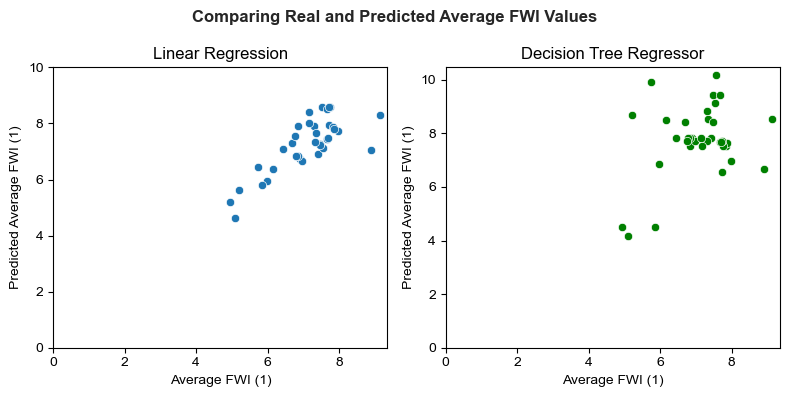

LINEAR REGRESSION DATA 

                 FWI_prediction       FWI
FWI_prediction        1.000000  0.784596
FWI                   0.784596  1.000000 


RMSE = 0.6399808039111398 
Squared R =  0.5292258255984597 
-----------------------


TREE REGRESSION DATA 

                  FWI_TreePredict       FWI
FWI_TreePredict         1.000000  0.350636
FWI                     0.350636  1.000000 


RMSE = 1.4747060698728418 
Squared R =  -1.4997102487681162 
-----------------------




In [60]:
# Create size
Mean_fig = plt.figure()
Mean_fig, axmean = plt.subplots(1,2,figsize=(8,4))

sns.scatterplot(mean_data_by_coordinates, y='FWI_prediction', x='FWI', ax= axmean[0],
               style= sns.set_style("darkgrid"))
sns.scatterplot(mean_data_by_coordinates, y='FWI_TreePredict',x='FWI', ax= axmean[1], 
                color='g', style= sns.set_style("darkgrid"))

# Subtitles
axmean[0].set_title('Linear Regression')
axmean[1].set_title('Decision Tree Regressor')

# Set Axis label
axmean[0].set_xlabel('Average FWI (1)')
axmean[0].set_ylabel('Predicted Average FWI (1)')
axmean[1].set_xlabel('Average FWI (1)')
axmean[1].set_ylabel('Predicted Average FWI (1)')

# Set Axis Limits
axmean[0].set_xlim(0)
axmean[0].set_ylim(0,10)
axmean[1].set_xlim(0)
axmean[1].set_ylim(0)

# Main title
plt.suptitle('Comparing Real and Predicted Average FWI Values', fontweight='bold')

# Adjust and show 
Mean_fig.tight_layout()
plt.show()

print('LINEAR REGRESSION DATA \n\n',
      mean_data_by_coordinates[['FWI_prediction','FWI']].corr(), 
      '\n\n\nRMSE =',sqrt(mean_squared_error(y_true= mean_data_by_coordinates.FWI, y_pred= y_prediction_mean)),
     '\nSquared R = ', r2_score(y_true= mean_data_by_coordinates.FWI, y_pred= y_prediction_mean),
      '\n-----------------------\n\n')

print('TREE REGRESSION DATA \n\n',
      mean_data_by_coordinates[['FWI_TreePredict','FWI']].corr(), 
      '\n\n\nRMSE =', sqrt(mean_squared_error(y_true= mean_data_by_coordinates.FWI, y_pred= y_TreePrediction_mean)),
      '\nSquared R = ', r2_score(y_true= mean_data_by_coordinates.FWI, y_pred= y_TreePrediction_mean),
      '\n-----------------------\n\n')

## Heatmaps comparing Predicted Average WFI and Real WFI

C:\Users\Tole 01\AppData\Local\Temp\ipykernel_54684\3947958864.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  Real_mean_FWI= mean_data_by_coordinates.pivot("Y","X", "FWI")
C:\Users\Tole 01\AppData\Local\Temp\ipykernel_54684\3947958864.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  LinearReg_mean_FWI= mean_data_by_coordinates.pivot("Y","X", "FWI_prediction")
C:\Users\Tole 01\AppData\Local\Temp\ipykernel_54684\3947958864.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  DecTreeReg_mean_FWI= mean_data_by_coordinates.pivot("Y","X", "FWI_TreePredict")


<Figure size 640x480 with 0 Axes>

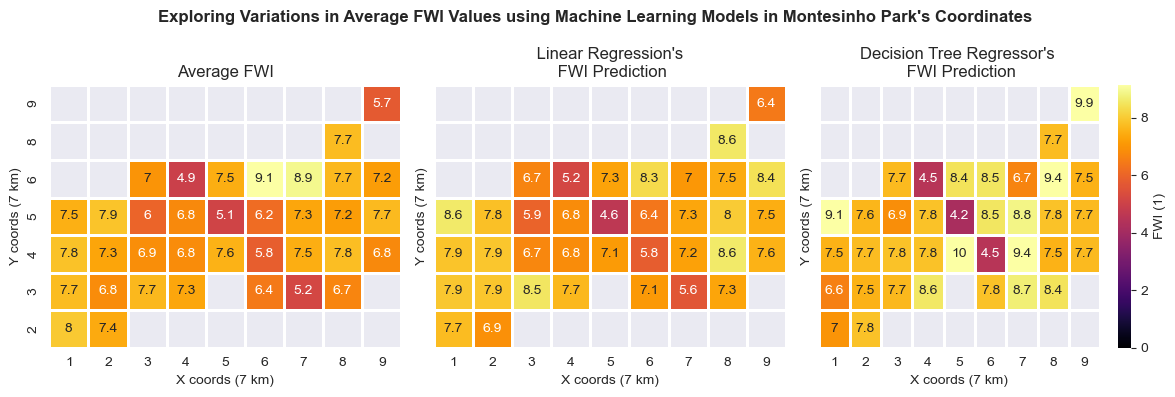

In [61]:
# Creating a Fig matrix that contains all the heatmap's data
Fig2 = plt.figure()
Fig2, ax2 = plt.subplots(1,3,figsize=(12,4), sharey=True)

# DFs for Heatmap
Real_mean_FWI= mean_data_by_coordinates.pivot("Y","X", "FWI")
LinearReg_mean_FWI= mean_data_by_coordinates.pivot("Y","X", "FWI_prediction")
DecTreeReg_mean_FWI= mean_data_by_coordinates.pivot("Y","X", "FWI_TreePredict")

# Max value on the scale
maxValue = mean_data_by_coordinates['FWI'].max()
barcolor = 'inferno'
linecolorsep= 'white'
linewidths = 1
lettersize = 15

# Heatmap Columns {0:Real Average FWI, 1: Linear Regression Prediction, 2: Prediction by Decision Tree Regression}
sns.heatmap(Real_mean_FWI, ax=ax2[0], vmin=0, vmax=maxValue,
            cbar=None, cmap =barcolor, annot=True, linewidths=linewidths, linecolor=linecolorsep)

sns.heatmap(LinearReg_mean_FWI, ax=ax2[1], vmin=0, vmax= maxValue,
            cbar=None, cmap =barcolor, annot=True, linewidths=linewidths, linecolor=linecolorsep)

sns.heatmap(DecTreeReg_mean_FWI, ax=ax2[2], vmin=0, vmax= maxValue, #cbar = None,
            cmap =barcolor, annot=True, linewidths=linewidths, linecolor=linecolorsep, 
            cbar_kws={'label': 'FWI (1)'})

# Invert Y axis to have an origin (0,0)
ax2[0].invert_yaxis()

# Titles of each graph
ax2[0].set_title('Average FWI')
ax2[1].set_title(""" Linear Regression's \n FWI Prediction""")
ax2[2].set_title("""Decision Tree Regressor's \n FWI Prediction""")

# X and Y labels
ax2[0].set_xlabel('X coords (7 km)')
ax2[1].set_xlabel('X coords (7 km)')
ax2[2].set_xlabel('X coords (7 km)')

ax2[0].set_ylabel('Y coords (7 km)')
ax2[1].set_ylabel('Y coords (7 km)')
ax2[2].set_ylabel('Y coords (7 km)')

# Main title
Fig2.suptitle("Exploring Variations in Average FWI Values using Machine Learning Models in Montesinho Park's Coordinates",
             fontweight='extra bold')

# Adjust Plots
Fig2.tight_layout()

# MEDIAN PREDICTION

## Median FWI Prediction by Linear Regression

In [62]:
# Prediction of average values Dataset
median_fwi_prediction = regressor.predict(median_data_by_coordinates[features])

# FWI are integer values, so we must rounding y_prediction results to compare them properly
#for i,n in zip(median_fwi_prediction, range(len(median_fwi_prediction))):
#    median_fwi_prediction[n] = round(float(i))

# Creating a column for predicter median FWI
median_data_by_coordinates['MedianFWI_prediction'] = median_fwi_prediction
median_data_by_coordinates[['X','Y','FWI', 'MedianFWI_prediction']].head()

,X,Y,FWI,MedianFWI_prediction
0,1,2,8.097094,7.711980
1,1,3,7.701163,8.284181
2,1,4,7.719952,7.971351
3,1,5,7.525109,8.485592
4,2,2,7.834983,7.555286


## Median FWI Prediction by Decision Tree Regressor

In [63]:
# Prediction Dataset
y_TreePrediction_median = tree_regressor.predict(median_data_by_coordinates[features])

# FWI are integer values, so we must rounding y_prediction results to compare them properly
#for i,n in zip(y_TreePrediction_median, range(len(y_TreePrediction_median))):
#    y_TreePrediction_median[n] = round(float(i))

# Creating a column for predicter median FWI
median_data_by_coordinates['MedianFWI_TreePredict'] = y_TreePrediction_median
median_data_by_coordinates[['X','Y','FWI', 'MedianFWI_TreePredict']].head()

,X,Y,FWI,MedianFWI_TreePredict
0,1,2,8.097094,6.889827
1,1,3,7.701163,6.649110
2,1,4,7.719952,7.546540
3,1,5,7.525109,9.509359
4,2,2,7.834983,9.987473


<Figure size 640x480 with 0 Axes>

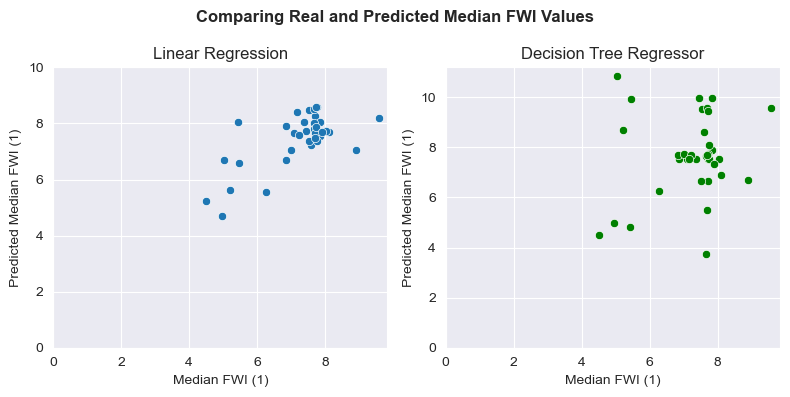

LINEAR REGRESSION DATA 

                       MedianFWI_prediction       FWI
MedianFWI_prediction              1.000000  0.692889
FWI                               0.692889  1.000000 


RMSE = 0.8480137140764404 
Squared R =  0.3970552403304831 
-----------------------


TREE REGRESSION DATA 

                        MedianFWI_TreePredict       FWI
MedianFWI_TreePredict               1.000000  0.180618
FWI                                 0.180618  1.000000 


RMSE = 1.826874848447827 
Squared R =  -1.7982683917391782 
-----------------------




In [64]:
# Create Fig and axes
Median_fig = plt.figure()
Mean_fig, axmedian = plt.subplots(1,2,figsize=(8,4))

# Create plots
sns.scatterplot(median_data_by_coordinates, y='MedianFWI_prediction', x='FWI', ax= axmedian[0])
sns.scatterplot(median_data_by_coordinates, y='MedianFWI_TreePredict',x='FWI', ax= axmedian[1], 
                color='g', style= sns.set_style("darkgrid"))

# Subtitles
axmedian[0].set_title('Linear Regression')
axmedian[1].set_title('Decision Tree Regressor')

# Set Axis label
axmedian[0].set_xlabel('Median FWI (1)')
axmedian[0].set_ylabel('Predicted Median FWI (1)')
axmedian[1].set_xlabel('Median FWI (1)')
axmedian[1].set_ylabel('Predicted Median FWI (1)')

# Set Axis Limits
axmedian[0].set_xlim(0)
axmedian[0].set_ylim(0,10)
axmedian[1].set_xlim(0)
axmedian[1].set_ylim(0)

# Main title
plt.suptitle('Comparing Real and Predicted Median FWI Values', fontweight='bold')

# Adjust and show 
Mean_fig.tight_layout()
plt.show()

# Print Statistics
print('LINEAR REGRESSION DATA \n\n',
      median_data_by_coordinates[['MedianFWI_prediction','FWI']].corr(), 
      '\n\n\nRMSE =',sqrt(mean_squared_error(y_true= median_data_by_coordinates.FWI, y_pred= median_fwi_prediction)),
     '\nSquared R = ', r2_score(y_true= median_data_by_coordinates.FWI, y_pred= median_fwi_prediction),
      '\n-----------------------\n\n')

print('TREE REGRESSION DATA \n\n',
      median_data_by_coordinates[['MedianFWI_TreePredict','FWI']].corr(), 
      '\n\n\nRMSE =', sqrt(mean_squared_error(y_true= median_data_by_coordinates.FWI, y_pred= y_TreePrediction_median)),
      '\nSquared R = ', r2_score(y_true= median_data_by_coordinates.FWI, y_pred= y_TreePrediction_median),
      '\n-----------------------\n\n')


## Heatmaps comparing Predicted Average WFI and Real WFI

C:\Users\Tole 01\AppData\Local\Temp\ipykernel_54684\1158642959.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  Real_median_FWI = median_data_by_coordinates.pivot("Y","X", "FWI")
C:\Users\Tole 01\AppData\Local\Temp\ipykernel_54684\1158642959.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  LinearReg_median_FWI = median_data_by_coordinates.pivot("Y","X", "MedianFWI_prediction")
C:\Users\Tole 01\AppData\Local\Temp\ipykernel_54684\1158642959.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  DecTreeReg_median_FWI = median_data_by_coordinates.pivot("Y","X", "MedianFWI_TreePredict")


<Figure size 640x480 with 0 Axes>

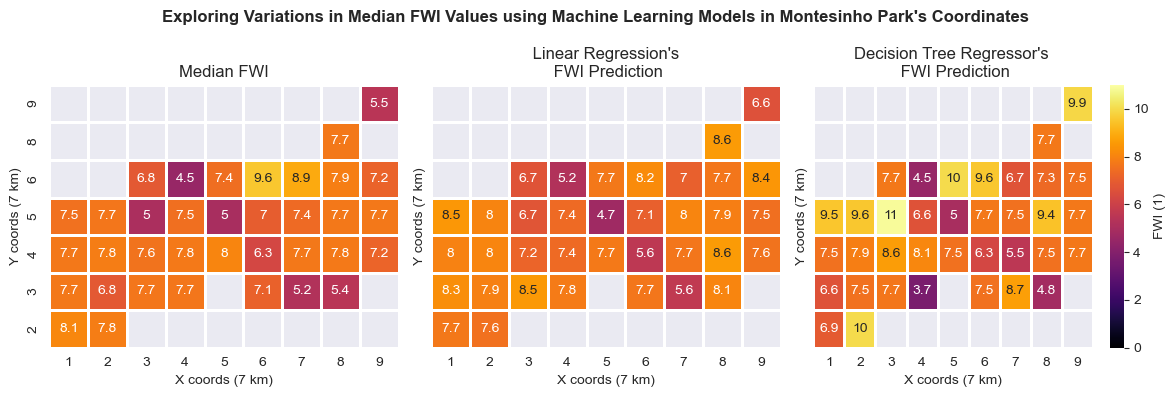

In [65]:
# Creating a Fig matrix that contains all the heatmap's data
Fig3 = plt.figure()
Fig3, ax3 = plt.subplots(1,3,figsize=(12,4), sharey=True)

# DFs for Heatmap
Real_median_FWI = median_data_by_coordinates.pivot("Y","X", "FWI")
LinearReg_median_FWI = median_data_by_coordinates.pivot("Y","X", "MedianFWI_prediction")
DecTreeReg_median_FWI = median_data_by_coordinates.pivot("Y","X", "MedianFWI_TreePredict")

# Max value on the scale
maxValue = 11
barcolor = 'inferno'
linecolorsep= 'white'
linewidths = 1

# Heatmap Columns {0: Real Median FWI, 1: Linear Regression Prediction, 2: Prediction by Decision Tree Regression}
sns.heatmap(Real_median_FWI, ax=ax3[0], vmin=0, vmax=maxValue, 
            cbar=None, cmap =barcolor, annot=True, linewidths=linewidths, linecolor=linecolorsep)

sns.heatmap(LinearReg_median_FWI, ax=ax3[1], vmin=0, vmax= maxValue, 
            cbar=None, cmap =barcolor, annot=True, linewidths=linewidths, linecolor=linecolorsep)

sns.heatmap(DecTreeReg_median_FWI, ax=ax3[2], vmin=0, vmax= maxValue, cbar_kws={'label': 'FWI (1)'},
            cmap =barcolor, annot=True, linewidths=linewidths, linecolor=linecolorsep)


# Invert Y axis to have an origin (0,0)
ax3[0].invert_yaxis()

# Titles of each graph
ax3[0].set_title('Median FWI')
ax3[1].set_title(""" Linear Regression's \n FWI Prediction""")
ax3[2].set_title("""Decision Tree Regressor's \n FWI Prediction""")

# Axis Titles
#Fig3.supxlabel('X Coordinates')
#Fig3.supylabel('Y Coordinates')

#Main title
Fig3.suptitle("Exploring Variations in Median FWI Values using Machine Learning Models in Montesinho Park's Coordinates", 
              fontweight='extra bold')

# X and Y labels
ax3[0].set_xlabel('X coords (7 km)')
ax3[1].set_xlabel('X coords (7 km)')
ax3[2].set_xlabel('X coords (7 km)')

ax3[0].set_ylabel('Y coords (7 km)')
ax3[1].set_ylabel('Y coords (7 km)')
ax3[2].set_ylabel('Y coords (7 km)')

# Adjust Plots
Fig3.tight_layout()

### EVALUATING ERRORS FOR DIFFERENT NUMBER OF RANDOMS STATES AND TEST SIZES

### Linear Regression Iterator Function

In [66]:
def linearRegression_iterator(test_size_fraction: float, iteration_numbers: int, NewDataset_forPrediction):
    
    # Create an empty Pandas DF
    linearRegressor_efficiency = pd.DataFrame(columns = ['Random_state', 'Test_size' , 'Base_Error', 'Prediction_Error']) 
    
    # Define X dataframe
    X = portugal_wildfires[features]
    
    # Define Y dataframe
    Y = portugal_wildfires[target]
    
    while test_size_fraction != 1: 
        
        Random_state_list=[]
        Test_size_list = []
        
        # Error_list is the  one referred to the error's relation between the training and test dataset. 
        Error_list = []
        # Predicted_error_list is the one referred to the error's relation between the training dataset and a new prediction dataframe. 
        PredictedLR_error_list = []
        
        # Establish a number of  iterations
        for i in range(1,iteration_numbers):
            
            # Stablish Random State Number  
            number_random_state=i
            
            # Define's  training and testing data
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= test_size_fraction, random_state = number_random_state)
            
            # Define model 
            Iter_regressor = LinearRegression()
            
            # Fit training data on the model
            Iter_regressor.fit(X_train, y_train)
            
            # Prediction Dataset
            iter_y_prediction = Iter_regressor.predict(X_test)
            
            # Error
            RMSE = sqrt(mean_squared_error(y_true= y_test, y_pred= iter_y_prediction))
            
            # Prediction and error from a new Dataset
            New_Prediction = Iter_regressor.predict(NewDataset_forPrediction[features])
            NewPrediction_LRRMSE = sqrt(mean_squared_error(y_true= NewDataset_forPrediction[target], y_pred= New_Prediction))
            
            # Append data on Lists
            Random_state_list.append(number_random_state)
            Test_size_list.append(test_size_fraction)
            Error_list.append(RMSE)
            PredictedLR_error_list.append(NewPrediction_LRRMSE)

            
            #Print random_state, test_size , Error
            #print(f'Random_state: {number_random_state}, Test_size: {test_size_fraction}, Error: {RMSE}')
            
        # Generates a spontaneous DF that contains all the data from the lists
        spontaneous_DF = pd.DataFrame({'Random_state':Random_state_list, 'Test_size':Test_size_list,'Base_Error':Error_list,
                                      'Prediction_Error':PredictedLR_error_list})
        
        # Concat the DFs linearRegressor_efficiency and spontaneous_DF
        linearRegressor_efficiency = pd.concat([linearRegressor_efficiency,spontaneous_DF], axis= 0)
        
        # Add 0.01 to the test_size_fraction
        test_size_fraction += 0.01
        
        # Break conditional
        if test_size_fraction >= 1:
            break
            print('Loop ended')
        
    return linearRegressor_efficiency

### Decision Tree Regressor Iteration Function

In [67]:
def DecisionTreeRegressor_iterator(test_size_fraction: float, iteration_numbers: int, max_TreeDepth_number:int, NewDataset_forPrediction):
    
    # Create an empty Pandas DF
    DecisionTreeRegressor_efficiency = pd.DataFrame(columns = ['Random_state', 'Test_size', 'Tree_Depth', 'Base_Error','Prediction_Error']) 
    
    # Define X dataframe
    X = portugal_wildfires[features]
    
    # Define Y dataframe
    Y = portugal_wildfires[target]
    
    while test_size_fraction != 1: 
        
        # Empty lists
        Random_state_list=[]
        Test_size_list = []
        TreeDepth_list = []
        
        # Error_list is the  one referred to the error's relation between the training and test dataset. 
        Error_list = []
        # Predicted_error_list is the one referred to the error's relation between the training dataset and a new prediction dataframe. 
        Predicted_error_list = []
        
        # Establish a number of  iterations
        for i in range(1,(iteration_numbers + 1)):
            
            # Stablish Random State Number  
            number_random_state=i
            
            # Define's  training and testing data
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= test_size_fraction, random_state = number_random_state)
            
            # Cycle for differents Tree depths
            for j in range(1,(max_TreeDepth_number + 1)):
                
                TreeDepth_number = j
                
                # Define model 
                Iter_tree_regressor = DecisionTreeRegressor(max_depth=TreeDepth_number)

                # Fit training data on the model
                Iter_tree_regressor.fit(X_train, y_train)

                # Prediction of Test Dataset
                Iter_y_TreePrediction = Iter_tree_regressor.predict(X_test)

                # Tree Base Error
                TreeRMSE = sqrt(mean_squared_error(y_true= y_test, y_pred= Iter_y_TreePrediction))
                
                # Prediction and error from a new Dataset
                New_TreePrediction = Iter_tree_regressor.predict(NewDataset_forPrediction[features])
                NewPrediction_TreeRMSE = sqrt(mean_squared_error(y_true= NewDataset_forPrediction[target], y_pred= New_TreePrediction))
            
                # Append data on Lists
                Random_state_list.append(number_random_state)
                Test_size_list.append(test_size_fraction)
                TreeDepth_list.append(TreeDepth_number)
                Error_list.append(TreeRMSE)
                Predicted_error_list.append(NewPrediction_TreeRMSE)
                
                #Print random_state, test_size , Error
                #print(f'Random_state: {number_random_state}, Test_size: {test_size_fraction}, Error: {RMSE}')
            
        # Generates a spontaneous DF that contains all the data from the lists
        spontaneous_DF = pd.DataFrame({'Random_state':Random_state_list, 'Test_size':Test_size_list, 'Tree_Depth':TreeDepth_list, 
                                       'Base_Error':Error_list,'Prediction_Error':Predicted_error_list})
        
        # Concat the DFs linearRegressor_efficiency and spontaneous_DF
        DecisionTreeRegressor_efficiency = pd.concat([DecisionTreeRegressor_efficiency,spontaneous_DF], axis= 0)
        
        # Add 0.01 to the test_size_fraction
        test_size_fraction += 0.01
        
        # Break conditional
        if test_size_fraction >= 1:
            break
            print('Loop ended')
        
    return DecisionTreeRegressor_efficiency

### Functions of evaluation

In [68]:
linear_regression_effiiciency_DF = linearRegression_iterator(0.10, 100,mean_data_by_coordinates) 

In [69]:
linear_regression_effiiciency_DF["Error_Difference"] = (linear_regression_effiiciency_DF.Base_Error - 
                                                        linear_regression_effiiciency_DF.Prediction_Error).abs()

In [70]:
#  & (linear_regression_effiiciency_DF.Error_Difference < 0.9)
linear_regression_effiiciency_DF[(linear_regression_effiiciency_DF.Prediction_Error < 0.65)
                                & (linear_regression_effiiciency_DF.Error_Difference < 0.9)].sort_values('Prediction_Error')

,Random_state,Test_size,Base_Error,Prediction_Error,Error_Difference
25,26,0.69,1.485959,0.597053,0.888906
93,94,0.59,1.479146,0.598206,0.880940
3,4,0.40,1.476385,0.598766,0.877619
48,49,0.62,1.459442,0.600522,0.858921
72,73,0.63,1.472812,0.600965,0.871847
...,...,...,...,...,...
83,84,0.29,1.232507,0.649959,0.582548
30,31,0.20,1.440515,0.649972,0.790544
60,61,0.85,1.528126,0.649979,0.878147
0,1,0.15,1.473983,0.649985,0.823998


In [71]:
DecisionTree_regression_effiiciency_DF = DecisionTreeRegressor_iterator(0.10, 100, 20, mean_data_by_coordinates)

In [72]:
DecisionTree_regression_effiiciency_DF["Error_Difference"] = (DecisionTree_regression_effiiciency_DF.Base_Error - 
                                                        DecisionTree_regression_effiiciency_DF.Prediction_Error).abs()

In [73]:
DecisionTree_regression_effiiciency_DF[DecisionTree_regression_effiiciency_DF.Prediction_Error < 0.7 ].sort_values('Prediction_Error')

,Random_state,Test_size,Tree_Depth,Base_Error,Prediction_Error,Error_Difference
1240,63,0.98,1,1.972695,0.630810,1.341885
724,37,0.90,5,1.817609,0.675178,1.142431
728,37,0.70,9,1.775072,0.683859,1.091213
